<a href="https://colab.research.google.com/github/artiebears13/CovidPredict/blob/main/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135148,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,8851.808,2.385,2.499,311.353,0.0,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3925.0,1424486.0,94.386,0.26,2900.0,0.192,0.013,76.9,tests performed,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,0.151,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
135149,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,8851.808,0.000,2.499,311.353,0.0,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6362499.0,3625221.0,2737278.0,NaN,52068.0,33163.0,42.16,24.02,18.14,NaN,2197.0,25915.0,0.172,44.44,1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df2=df[df['location']=='Russia']
#reindexing
new_index=range(0,len(df2))
df2.reset_index(drop=True,inplace=True)
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.014,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,-5528.7,-3.32,-3.32,-37.890641
1,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
3,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
4,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,0.014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,RUS,Europe,Russia,2021-11-18,9063318.0,36155.0,37003.000,255448.0,1219.0,1206.857,62114.950,247.786,253.598,1750.699,8.354,8.271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463705.0,3.178,0.08,12.5,tests performed,117352790.0,62891581.0,52506988.0,2767890.0,726364.0,835405.0,80.43,43.10,35.99,1.90,5725.0,478345.0,0.328,NaN,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
658,RUS,Europe,Russia,2021-11-19,9099253.0,35935.0,36573.571,256669.0,1221.0,1209.429,62361.229,246.279,250.655,1759.067,8.368,8.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219459637.0,1504.055,NaN,492473.0,3.375,NaN,NaN,tests performed,118078630.0,63284

In [ ]:
df2.to_excel('Russia_08_11.xlsx')
df2.to_csv('Russia_08_11.csv')

In [ ]:
#fill NaN
index_last=0
df2.at[df2.index[0],'total_tests']=0
for i in range(len(df2)-1):
    if np.isnan(df2.at[df2.index[i],'total_tests'])==True:
        df2.at[df2.index[i],'total_tests']=df2.at[df2.index[index_last],'total_tests']
    else:
        index_last=i
df2.at[df2.index[-1],'total_tests']=df2.at[df2.index[index_last],'total_tests']

index_last=0
df2.at[df2.index[0],'total_vaccinations']=0
for i in range(len(df2)-1):
    if np.isnan(df2.at[df2.index[i],'total_vaccinations'])==True:
        df2.at[df2.index[i],'total_vaccinations']=df2.at[df2.index[index_last],'total_vaccinations']
    else:
        index_last=i
df2.at[df2.index[-1],'total_vaccinations']=df2.at[df2.index[index_last],'total_vaccinations']


index_last=0
df2.at[df2.index[0],'total_deaths']=0
for i in range(len(df2)-1):
    if np.isnan(df2.at[df2.index[i],'total_deaths'])==True:
        df2.at[df2.index[i],'total_deaths']=df2.at[df2.index[index_last],'total_deaths']
    else:
        index_last=i
df2.at[df2.index[-1],'total_deaths']=df2.at[df2.index[index_last],'total_deaths']


df2['vax_rate']=df2.total_vaccinations/df2.population*100
df2['test_rate']=df2.total_tests/df2.population*100
df2['case_rate']=df2.total_cases/df2.population*100
df2['death_rate']=df2.total_deaths/df2.population*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

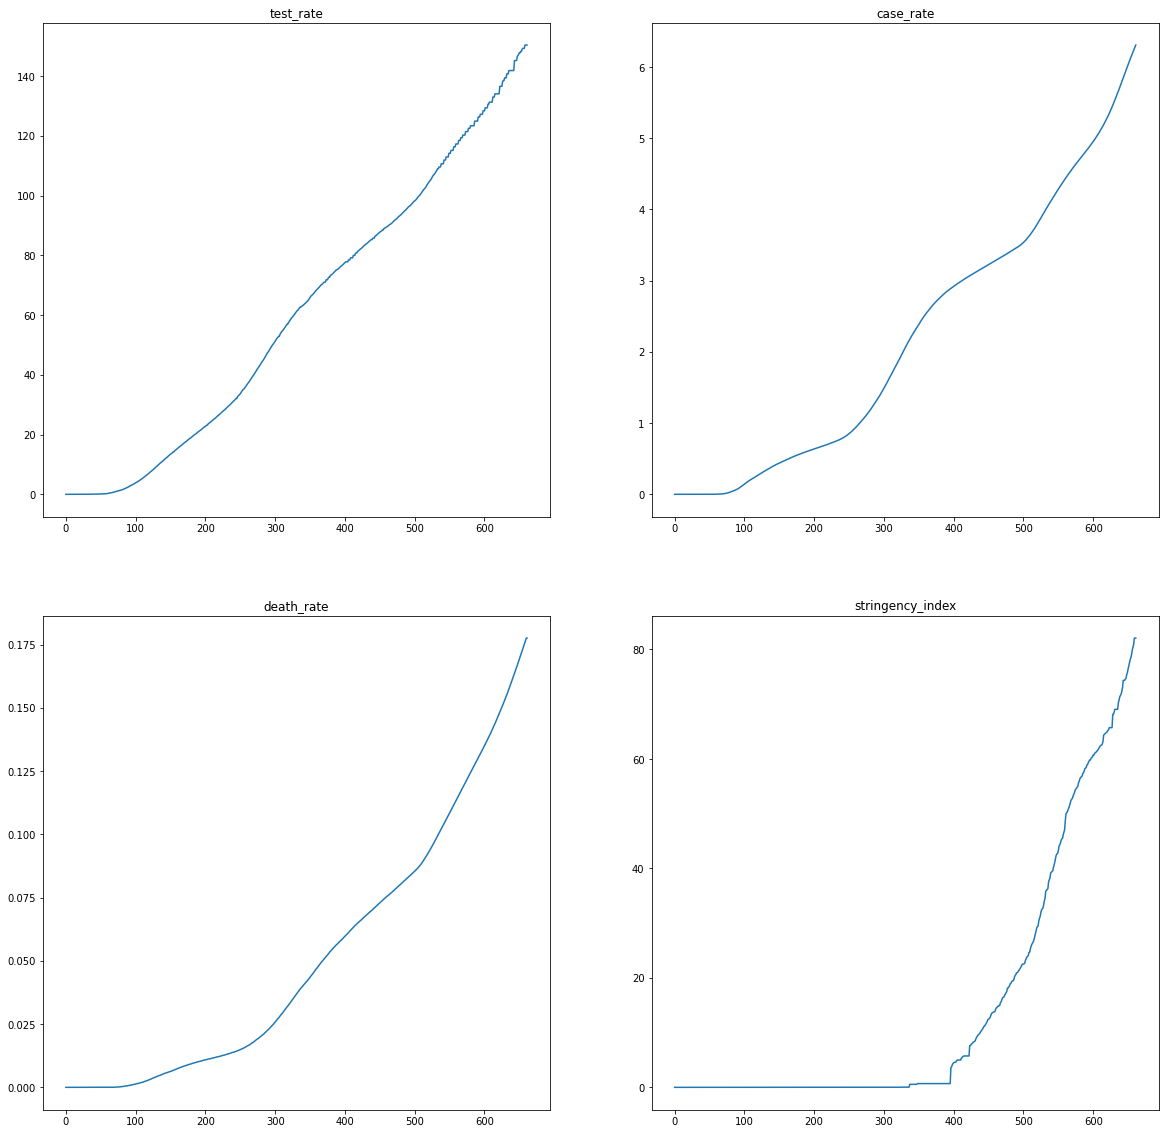

In [ ]:




fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,20),sharex=True, sharey=False)

plt.subplot(2,2, 1)
plt.plot(df2['test_rate'])
plt.title('test_rate')

plt.subplot(2,2, 2)
plt.plot(df2['case_rate'])
plt.title('case_rate')

plt.subplot(2,2, 3)
plt.plot(df2['death_rate'])
plt.title('death_rate')

plt.subplot(2,2, 4)
plt.plot(df2['vax_rate'])
plt.title('stringency_index')

plt.show()

In [ ]:
df2['test_rate'].corr(df2['case_rate'])

0.9951863568311082

In [ ]:
df2['test_rate'].corr(df2['death_rate'])

0.9758055353516684

stringency_index-индекс строгости - это мера строгости страны в отношении количества введенных ограничений covid, от 0 до 100, где 0 является самым низким. Сама по себе строгость показывает довольно низкую корреляцию с уровнем смертности или инфекций, поскольку страны, указанные точками, довольно разбросаны по всему миру. Очень небольшая разница в уровнях смертности и инфицирования объясняется строгостью, и это может быть подтверждено следующей статистикой корреляции.

In [ ]:
df2['stringency_index'].corr(df2['case_rate'])

-0.20674443689527283

In [ ]:
df2['vax_rate'].corr(df2['case_rate'])

0.8773389199995818

In [ ]:
df2['aged_65_older'].corr(df2['death_rate'])

3.7208391458817695e-16

In [ ]:
df2['aged_65_older'].corr(df2['case_rate'])

3.7314263515846697e-16


# Прогнозирование уровня вакцинации

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from random import random
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Keeping only relevant columns
df = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths','reproduction_rate', 'icu_patients',
         'hosp_patients','new_tests', 'total_tests','positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]
#A very important step
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
reproduction_rate                    float64
icu_patients                         float64
hosp_patients                        float64
new_tests                            float64
total_tests                          float64
positive_rate                        float64
tests_per_case                       float64
tests_units                           object
total_vaccinations                   float64
people_vaccinated                    float64
people_fully_vaccinated              float64
new_vaccinations                     float64
stringency_index                     float64
population                           float64
population

In [ ]:
# Creating function for additional columns and some analyses
def analyse_df(df):
    df['case_rate'] = (df['total_cases']/df['population'])*100
    df['death_rate'] = (df['total_deaths']/df['population'])*100
    df['test_rate'] = (df['total_tests']/df['population'])*100
    df['admissions_rate'] = (df['hosp_patients']/df['population'])*100
    df['critical_rate'] = (df['icu_patients']/df['population'])*100
    df['vaccination_rate'] = (df['people_fully_vaccinated']/df['population'])*100
    print('Columns: ', df.columns)
    print('Dataframe shape: ', df.shape)
    print('Date Range', df['date'].min(),df['date'].max())
    #get some stats for each country using groupby
    stats_df = df.groupby('location')[['date','case_rate','death_rate','test_rate','vaccination_rate',
                    'admissions_rate','critical_rate','stringency_index',
                                 'population']].agg({"date":['max', 'count'],
                 'case_rate':'max','death_rate':'max','test_rate':'max','vaccination_rate':'max',
                    'admissions_rate':'mean','critical_rate':'mean','stringency_index':'mean','population':'mean'})
    display(stats_df)
    display(df.corr())
    sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
    plt.xticks(rotation=45)
    rcParams['figure.figsize'] = 12,8
    return df, stats_df

Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (135153, 42)
Date Range 2020-01-01 00:00:00 2021-11-22 00:00:00


date        ... stringency_index    population
                         max count  ...             mean          mean
location                            ...                               
Afghanistan       2021-11-22   638  ...        38.700895  3.983543e+07
Africa            2021-11-22   649  ...              NaN  1.373486e+09
Albania           2021-11-22   637  ...        56.939299  2.872934e+06
Algeria           2021-11-22   637  ...        66.250747  4.461663e+07
Andorra           2021-11-22   631  ...        48.402048  7.735400e+04
...                      ...   ...  ...              ...           ...
Wallis and Futuna 2021-11-22   245  ...              NaN  1.109400e+04
World             2021-11-22   671  ...              NaN  7.874966e+09
Yemen             2021-11-22   592  ...        34.262509  3.049064e+07
Zambia            2021-11-22   615  ...        44.965543  1.892066e+07
Zimbabwe          2021-11-22   613  ...        68.483546  1.509217e+07

[237 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.812994,0.984993,0.752533,-0.000922,0.759062,6.874956e-01,0.778370,0.936001,-0.015465,-0.035596,0.805524,0.834766,0.778874,0.789227,0.040164,0.649432,-0.016131,0.032554,0.028961,0.025731,0.015430,-0.035275,-0.036496,0.018279,-0.004202,-0.008545,3.343835e-02,-0.007833,0.020993,0.036251,0.117468,0.137783,0.059692,2.553568e-02,0.163528,0.016019
new_cases,0.812994,1.000000,0.820099,0.924154,0.016491,0.899630,8.855550e-01,0.719959,0.566469,0.101922,-0.040254,0.546367,0.558902,0.503968,0.646958,0.093111,0.717400,-0.017934,0.037015,0.032758,0.029185,0.015992,-0.040048,-0.038929,0.019446,-0.005518,-0.005128,3.933388e-02,-0.006737,0.023474,0.040536,0.062873,0.078950,0.016785,1.413650e-01,0.292918,-0.079066
total_deaths,0.984993,0.820099,1.000000,0.785897,-0.001093,0.769914,7.116609e-01,0.693956,0.817425,0.031828,-0.046669,0.776574,0.801035,0.749010,0.770633,0.043461,0.659959,-0.019496,0.032141,0.027510,0.024761,0.008364,-0.041593,-0.041169,0.024437,-0.007058,-0.005874,4.057877e-02,-0.010127,0.022791,0.037317,0.105024,0.162291,0.030055,2.940215e-02,0.164813,0.004466
new_deaths,0.752533,0.924154,0.785897,1.000000,0.005653,0.869883,8.834194e-01,0.606569,0.461509,0.183887,-0.050007,0.484889,0.496332,0.431064,0.625855,0.128344,0.735166,-0.021747,0.033403,0.026313,0.022918,0.003844,-0.045865,-0.036843,0.027955,-0.011819,0.002057,4.727657e-02,-0.008931,0.020865,0.037522,0.031755,0.078227,-0.030594,2.066559e-01,0.353900,-0.130139
reproduction_rate,-0.000922,0.016491,-0.001093,0.005653,1.000000,-0.062779,-6.881749e-02,-0.031460,-0.037364,0.081948,-0.106697,-0.001463,-0.010657,-0.006077,-0.009541,0.161546,0.034896,0.005829,0.166835,0.161663,0.156691,0.083058,-0.176358,-0.050033,-0.015762,0.112527,0.010161,1.469800e-01,0.081747,0.154761,0.168040,-0.003158,-0.011635,-0.032637,-1.277220e-01,-0.183868,0.074037
icu_patients,0.759062,0.899630,0.769914,0.869883,-0.062779,1.000000,9.629914e-01,0.794695,0.719574,0.114643,-0.094012,0.589217,0.603496,0.568277,0.542418,0.158815,0.844164,-0.101921,-0.035945,-0.016782,-0.015277,0.119038,0.100886,-0.083415,0.190146,0.009379,-0.107573,5.229586e-01,-0.062676,-0.069934,0.100871,0.126445,0.178327,-0.035061,1.564582e-01,0.356931,-0.070663
hosp_patients,0.687496,0.885555,0.711661,0.883419,-0.068817,0.962991,1.000000e+00,0.754195,0.653579,0.206982,-0.117278,0.519143,0.535012,0.501107,0.534775,0.228954,0.802797,-0.087047,-0.035496,-0.010454,-0.012651,0.046756,0.361490,-0.080615,0.167129,-0.006884,-0.078993,1.737597e-15,-0.094513,-0.039109,0.019023,0.102497,0.169799,-0.053521,2.887185e-01,0.404191,-0.112181
new_tests,0.778370,0.719959,0.693956,0.606569,-0.031460,0.794695,7.541955e-01,1.000000,0.834187,-0.083269,-0.014541,0.631229,0.627536,0.601919,0.615267,0.058696,0.618547,0.006105,0.099591,0.100360,0.097111,0.114174,-0.052755,-0.049166,0.086585,0.072191,-0.053506,2.720612e-02,-0.018537,0.069442,0.115015,0.177919,0.151296,0.152846,3.931486e-02,0.193646,0.034471
total_tests,0.936001,0.566469,0.817425,0.461509,-0.037364,0.719574,6.535793e-01,0.834187,1.000000,-0.078130,-0.010653,0.835917,0.803597,0.853269,0.648506,-0.003316,0.544604,-0.001720,0.072497,0.071601,0.067494,0.100899,-0.043270,-0.029673,0.093958,0.047452,-0.061792,1.833274e-02,-0.030169,0.047851,0.093721,0.229996,0.182334,0.179348,-1.654904e-02,0.147578,0.112834
positive_rate,-0.015465,0.101922,0.031828,0.183887,0.081948,0.114643,2.069823e-01,-0.083269,-0.078130,1.000000,-

Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (135153, 42)
Date Range 2020-01-01 00:00:00 2021-11-22 00:00:00


date        ... stringency_index    population
                         max count  ...             mean          mean
location                            ...                               
Afghanistan       2021-11-22   638  ...        38.700895  3.983543e+07
Africa            2021-11-22   649  ...              NaN  1.373486e+09
Albania           2021-11-22   637  ...        56.939299  2.872934e+06
Algeria           2021-11-22   637  ...        66.250747  4.461663e+07
Andorra           2021-11-22   631  ...        48.402048  7.735400e+04
...                      ...   ...  ...              ...           ...
Wallis and Futuna 2021-11-22   245  ...              NaN  1.109400e+04
World             2021-11-22   671  ...              NaN  7.874966e+09
Yemen             2021-11-22   592  ...        34.262509  3.049064e+07
Zambia            2021-11-22   615  ...        44.965543  1.892066e+07
Zimbabwe          2021-11-22   613  ...        68.483546  1.509217e+07

[237 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.812994,0.984993,0.752533,-0.000922,0.759062,6.874956e-01,0.778370,0.936001,-0.015465,-0.035596,0.805524,0.834766,0.778874,0.789227,0.040164,0.649432,-0.016131,0.032554,0.028961,0.025731,0.015430,-0.035275,-0.036496,0.018279,-0.004202,-0.008545,3.343835e-02,-0.007833,0.020993,0.036251,0.117468,0.137783,0.059692,2.553568e-02,0.163528,0.016019
new_cases,0.812994,1.000000,0.820099,0.924154,0.016491,0.899630,8.855550e-01,0.719959,0.566469,0.101922,-0.040254,0.546367,0.558902,0.503968,0.646958,0.093111,0.717400,-0.017934,0.037015,0.032758,0.029185,0.015992,-0.040048,-0.038929,0.019446,-0.005518,-0.005128,3.933388e-02,-0.006737,0.023474,0.040536,0.062873,0.078950,0.016785,1.413650e-01,0.292918,-0.079066
total_deaths,0.984993,0.820099,1.000000,0.785897,-0.001093,0.769914,7.116609e-01,0.693956,0.817425,0.031828,-0.046669,0.776574,0.801035,0.749010,0.770633,0.043461,0.659959,-0.019496,0.032141,0.027510,0.024761,0.008364,-0.041593,-0.041169,0.024437,-0.007058,-0.005874,4.057877e-02,-0.010127,0.022791,0.037317,0.105024,0.162291,0.030055,2.940215e-02,0.164813,0.004466
new_deaths,0.752533,0.924154,0.785897,1.000000,0.005653,0.869883,8.834194e-01,0.606569,0.461509,0.183887,-0.050007,0.484889,0.496332,0.431064,0.625855,0.128344,0.735166,-0.021747,0.033403,0.026313,0.022918,0.003844,-0.045865,-0.036843,0.027955,-0.011819,0.002057,4.727657e-02,-0.008931,0.020865,0.037522,0.031755,0.078227,-0.030594,2.066559e-01,0.353900,-0.130139
reproduction_rate,-0.000922,0.016491,-0.001093,0.005653,1.000000,-0.062779,-6.881749e-02,-0.031460,-0.037364,0.081948,-0.106697,-0.001463,-0.010657,-0.006077,-0.009541,0.161546,0.034896,0.005829,0.166835,0.161663,0.156691,0.083058,-0.176358,-0.050033,-0.015762,0.112527,0.010161,1.469800e-01,0.081747,0.154761,0.168040,-0.003158,-0.011635,-0.032637,-1.277220e-01,-0.183868,0.074037
icu_patients,0.759062,0.899630,0.769914,0.869883,-0.062779,1.000000,9.629914e-01,0.794695,0.719574,0.114643,-0.094012,0.589217,0.603496,0.568277,0.542418,0.158815,0.844164,-0.101921,-0.035945,-0.016782,-0.015277,0.119038,0.100886,-0.083415,0.190146,0.009379,-0.107573,5.229586e-01,-0.062676,-0.069934,0.100871,0.126445,0.178327,-0.035061,1.564582e-01,0.356931,-0.070663
hosp_patients,0.687496,0.885555,0.711661,0.883419,-0.068817,0.962991,1.000000e+00,0.754195,0.653579,0.206982,-0.117278,0.519143,0.535012,0.501107,0.534775,0.228954,0.802797,-0.087047,-0.035496,-0.010454,-0.012651,0.046756,0.361490,-0.080615,0.167129,-0.006884,-0.078993,1.737597e-15,-0.094513,-0.039109,0.019023,0.102497,0.169799,-0.053521,2.887185e-01,0.404191,-0.112181
new_tests,0.778370,0.719959,0.693956,0.606569,-0.031460,0.794695,7.541955e-01,1.000000,0.834187,-0.083269,-0.014541,0.631229,0.627536,0.601919,0.615267,0.058696,0.618547,0.006105,0.099591,0.100360,0.097111,0.114174,-0.052755,-0.049166,0.086585,0.072191,-0.053506,2.720612e-02,-0.018537,0.069442,0.115015,0.177919,0.151296,0.152846,3.931486e-02,0.193646,0.034471
total_tests,0.936001,0.566469,0.817425,0.461509,-0.037364,0.719574,6.535793e-01,0.834187,1.000000,-0.078130,-0.010653,0.835917,0.803597,0.853269,0.648506,-0.003316,0.544604,-0.001720,0.072497,0.071601,0.067494,0.100899,-0.043270,-0.029673,0.093958,0.047452,-0.061792,1.833274e-02,-0.030169,0.047851,0.093721,0.229996,0.182334,0.179348,-1.654904e-02,0.147578,0.112834
positive_rate,-0.015465,0.101922,0.031828,0.183887,0.081948,0.114643,2.069823e-01,-0.083269,-0.078130,1.000000,-

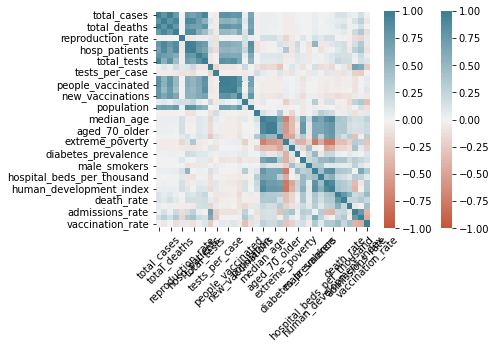

In [ ]:
df = analyse_df(df)[0]
stats_df = analyse_df(df)[1]

In [ ]:
def poly(name, group):
    # transfrom the date into an integer to be able to fit it into the model
    group['date_transformed'] = group['date'].map(dt.datetime.toordinal) 
    # Create a range to be able to tell the model later to predict within this range. I want to predict for a range that is 10 points more than half the number of observations in input data.
    Range = group['date_transformed'].max() + round(len(group)/2) + 10
    predict_dates = list(range(group['date_transformed'].max() + 1, Range))
    
    # Build the model
    # Make sure to transfrom the input data
    x = group['date_transformed'].values[:,np.newaxis]
    y = group['vaccination_rate'].values
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    # Test the model and its accuracy
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    # Save the predictions as a column of the input data
    group['Pred'] = y_poly_pred
    group_export = group[['date','vaccination_rate','Pred']].set_index('date')
    # View results
    print(name)
    print('rmse: ', rmse)
    print('r2: ', r2)
    return model, polynomial_features, predict_dates, group_export

In [ ]:
# Create grouped data for access later
df_grouped = df.groupby(['iso_code','continent','location'])


 ------------- ('ABW', 'North America', 'Aruba') --------------
('ABW', 'North America', 'Aruba')
rmse:  3.436985358662922
r2:  0.9656009673411543
('ABW', 'North America', 'Aruba')
rmse:  3.436985358662922
r2:  0.9656009673411543
('ABW', 'North America', 'Aruba')
rmse:  3.436985358662922
r2:  0.9656009673411543
('ABW', 'North America', 'Aruba')
rmse:  3.436985358662922
r2:  0.9656009673411543


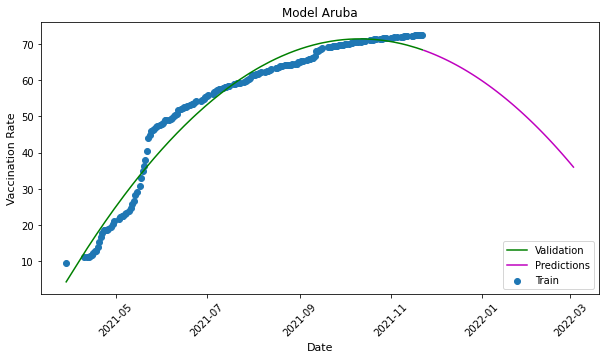

Observations in Actual Data = 185.000000, Predicted Observations=101.000000

 ------------- ('AFG', 'Asia', 'Afghanistan') --------------

 ------------- ('AGO', 'Africa', 'Angola') --------------

 ------------- ('AIA', 'North America', 'Anguilla') --------------

 ------------- ('ALB', 'Europe', 'Albania') --------------
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999
('ALB', 'Europe', 'Albania')
rmse:  0.6647624939032477
r2:  0.9937832595502999


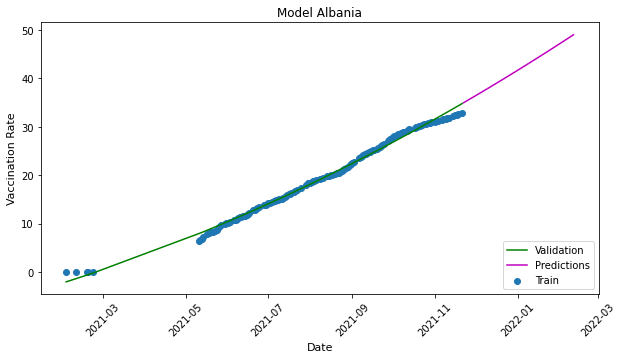

Observations in Actual Data = 146.000000, Predicted Observations=82.000000

 ------------- ('AND', 'Europe', 'Andorra') --------------

 ------------- ('ARE', 'Asia', 'United Arab Emirates') --------------
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528
('ARE', 'Asia', 'United Arab Emirates')
rmse:  0.6045341539146472
r2:  0.9975581530122528


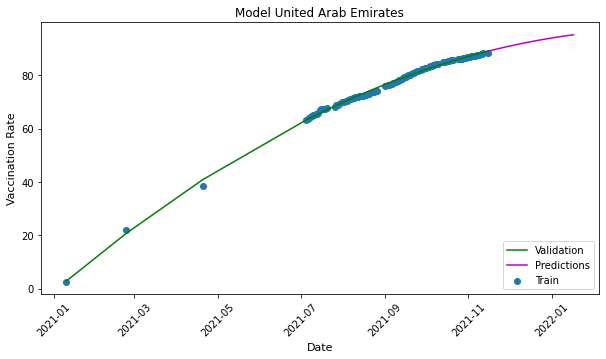

Observations in Actual Data = 108.000000, Predicted Observations=63.000000

 ------------- ('ARG', 'South America', 'Argentina') --------------
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811
('ARG', 'South America', 'Argentina')
rmse:  2.8888953083432285
r2:  0.9800043337782811


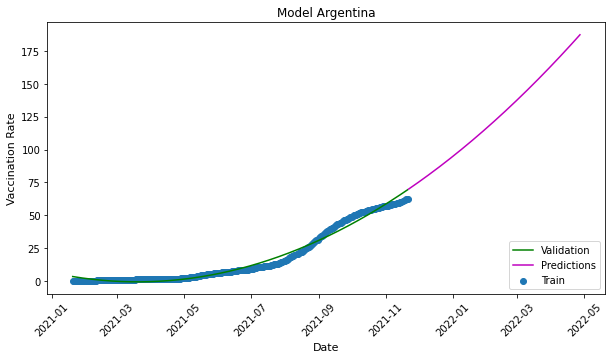

Observations in Actual Data = 295.000000, Predicted Observations=157.000000

 ------------- ('ARM', 'Asia', 'Armenia') --------------

 ------------- ('ATG', 'North America', 'Antigua and Barbuda') --------------
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209
('ATG', 'North America', 'Antigua and Barbuda')
rmse:  3.1670107384527997
r2:  0.922867370314209


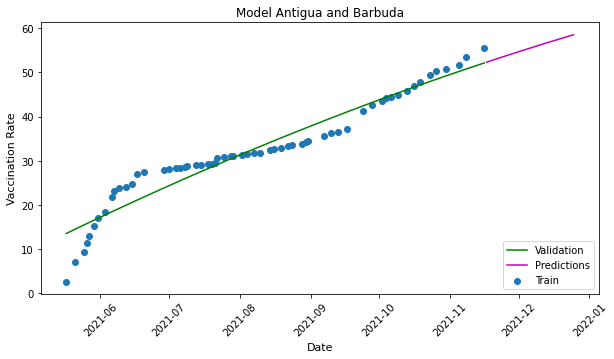

Observations in Actual Data = 61.000000, Predicted Observations=39.000000

 ------------- ('AUS', 'Oceania', 'Australia') --------------
('AUS', 'Oceania', 'Australia')
rmse:  1.5705995854637183
r2:  0.9954528913905137
('AUS', 'Oceania', 'Australia')
rmse:  1.5705995854637183
r2:  0.9954528913905137
('AUS', 'Oceania', 'Australia')
rmse:  1.5705995854637183
r2:  0.9954528913905137
('AUS', 'Oceania', 'Australia')
rmse:  1.5705995854637183
r2:  0.9954528913905137


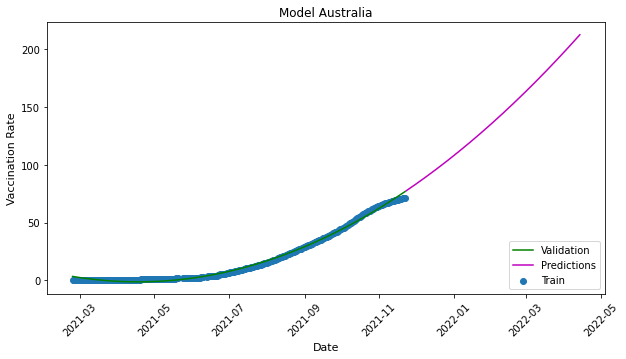

Observations in Actual Data = 268.000000, Predicted Observations=143.000000

 ------------- ('AUT', 'Europe', 'Austria') --------------
('AUT', 'Europe', 'Austria')
rmse:  6.142265230149972
r2:  0.9383814570740391
('AUT', 'Europe', 'Austria')
rmse:  6.142265230149972
r2:  0.9383814570740391
('AUT', 'Europe', 'Austria')
rmse:  6.142265230149972
r2:  0.9383814570740391
('AUT', 'Europe', 'Austria')
rmse:  6.142265230149972
r2:  0.9383814570740391


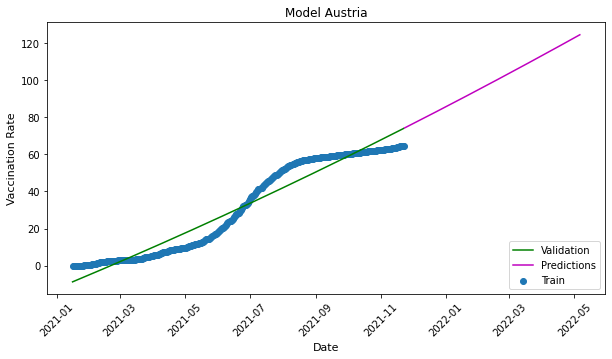

Observations in Actual Data = 311.000000, Predicted Observations=165.000000

 ------------- ('AZE', 'Asia', 'Azerbaijan') --------------
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5593755944825665
r2:  0.9871255640521279
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5593755944825665
r2:  0.9871255640521279
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5593755944825665
r2:  0.9871255640521279
('AZE', 'Asia', 'Azerbaijan')
rmse:  1.5593755944825665
r2:  0.9871255640521279


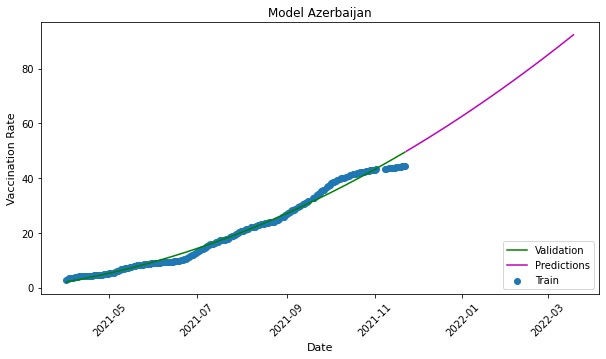

Observations in Actual Data = 216.000000, Predicted Observations=117.000000

 ------------- ('BDI', 'Africa', 'Burundi') --------------

 ------------- ('BEL', 'Europe', 'Belgium') --------------
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337
('BEL', 'Europe', 'Belgium')
rmse:  7.968646788321573
r2:  0.9302017038660337


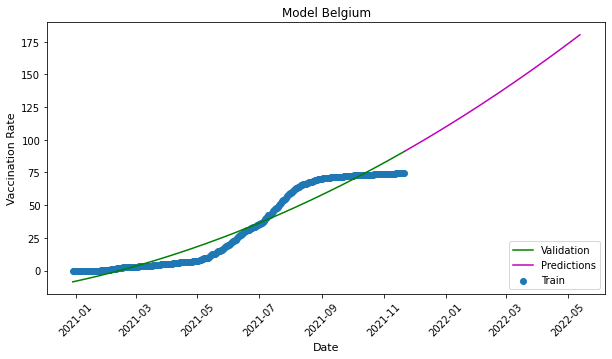

Observations in Actual Data = 328.000000, Predicted Observations=173.000000

 ------------- ('BEN', 'Africa', 'Benin') --------------

 ------------- ('BES', 'North America', 'Bonaire Sint Eustatius and Saba') --------------

 ------------- ('BFA', 'Africa', 'Burkina Faso') --------------

 ------------- ('BGD', 'Asia', 'Bangladesh') --------------
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814
('BGD', 'Asia', 'Bangladesh')
rmse:  1.209164945244973
r2:  0.9509737611681814


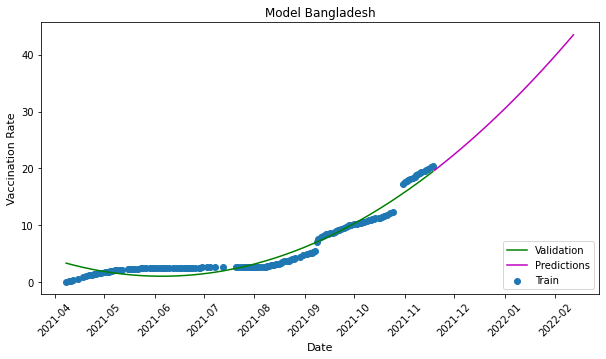

Observations in Actual Data = 154.000000, Predicted Observations=86.000000

 ------------- ('BGR', 'Europe', 'Bulgaria') --------------
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1635771711641871
r2:  0.9795595188198898
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1635771711641871
r2:  0.9795595188198898
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1635771711641871
r2:  0.9795595188198898
('BGR', 'Europe', 'Bulgaria')
rmse:  1.1635771711641871
r2:  0.9795595188198898


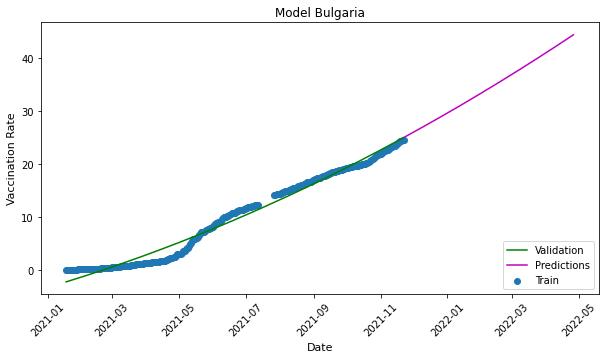

Observations in Actual Data = 293.000000, Predicted Observations=155.000000

 ------------- ('BHR', 'Asia', 'Bahrain') --------------
('BHR', 'Asia', 'Bahrain')
rmse:  2.001190521743354
r2:  0.9877459201016449
('BHR', 'Asia', 'Bahrain')
rmse:  2.001190521743354
r2:  0.9877459201016449
('BHR', 'Asia', 'Bahrain')
rmse:  2.001190521743354
r2:  0.9877459201016449
('BHR', 'Asia', 'Bahrain')
rmse:  2.001190521743354
r2:  0.9877459201016449


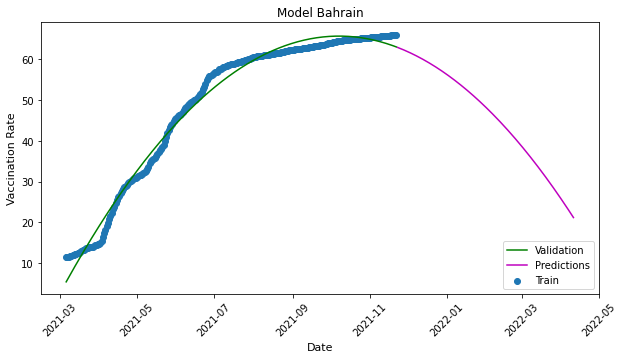

Observations in Actual Data = 262.000000, Predicted Observations=140.000000

 ------------- ('BHS', 'North America', 'Bahamas') --------------

 ------------- ('BIH', 'Europe', 'Bosnia and Herzegovina') --------------

 ------------- ('BLR', 'Europe', 'Belarus') --------------

 ------------- ('BLZ', 'North America', 'Belize') --------------
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116
('BLZ', 'North America', 'Belize')
rmse:  1.4780675479416299
r2:  0.9794287924707116


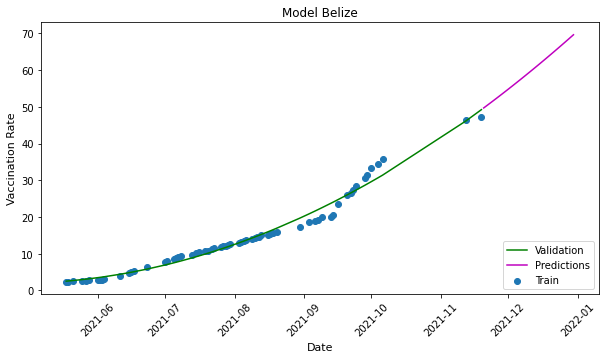

Observations in Actual Data = 65.000000, Predicted Observations=41.000000

 ------------- ('BMU', 'North America', 'Bermuda') --------------

 ------------- ('BOL', 'South America', 'Bolivia') --------------
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528
('BOL', 'South America', 'Bolivia')
rmse:  1.613843981649402
r2:  0.9752306657638528


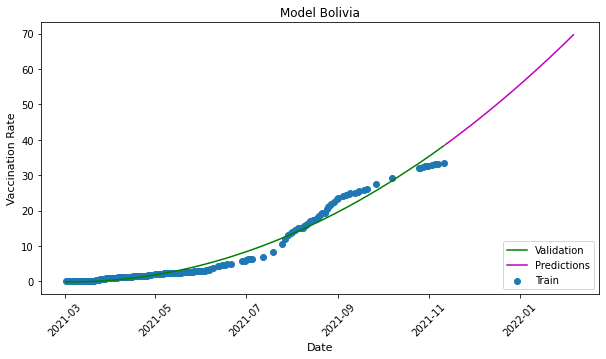

Observations in Actual Data = 156.000000, Predicted Observations=87.000000

 ------------- ('BRA', 'South America', 'Brazil') --------------
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335
('BRA', 'South America', 'Brazil')
rmse:  1.5144110861657711
r2:  0.9918728333326335


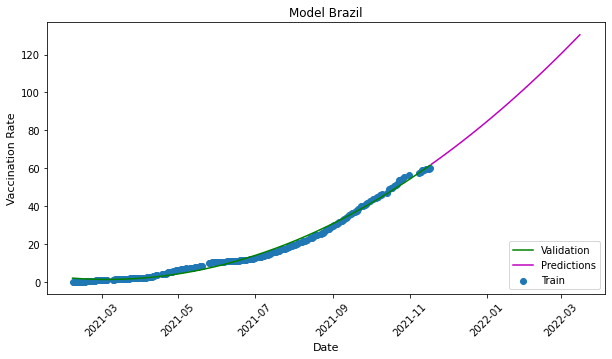

Observations in Actual Data = 221.000000, Predicted Observations=119.000000

 ------------- ('BRB', 'North America', 'Barbados') --------------
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818
('BRB', 'North America', 'Barbados')
rmse:  1.7873633622208591
r2:  0.9670446697486818


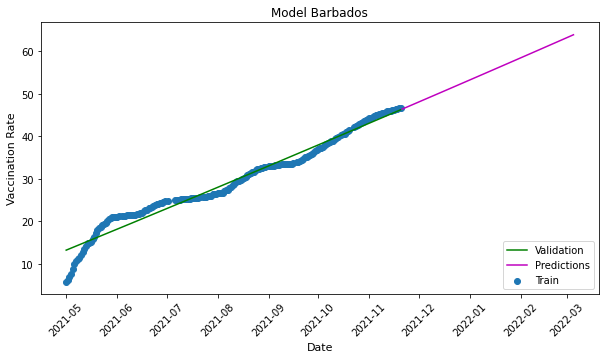

Observations in Actual Data = 192.000000, Predicted Observations=105.000000

 ------------- ('BRN', 'Asia', 'Brunei') --------------
('BRN', 'Asia', 'Brunei')
rmse:  2.5583249852002954
r2:  0.9900606206799459
('BRN', 'Asia', 'Brunei')
rmse:  2.5583249852002954
r2:  0.9900606206799459
('BRN', 'Asia', 'Brunei')
rmse:  2.5583249852002954
r2:  0.9900606206799459
('BRN', 'Asia', 'Brunei')
rmse:  2.5583249852002954
r2:  0.9900606206799459


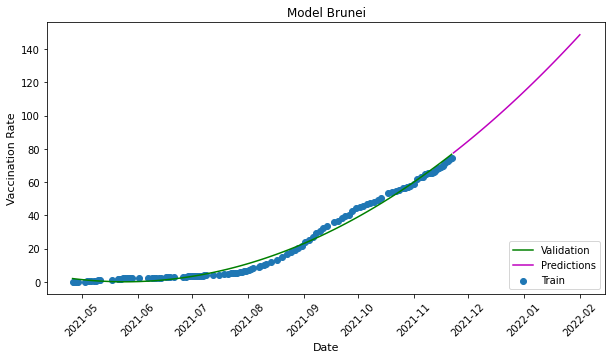

Observations in Actual Data = 123.000000, Predicted Observations=71.000000

 ------------- ('BTN', 'Asia', 'Bhutan') --------------

 ------------- ('BWA', 'Africa', 'Botswana') --------------

 ------------- ('CAF', 'Africa', 'Central African Republic') --------------

 ------------- ('CAN', 'North America', 'Canada') --------------
('CAN', 'North America', 'Canada')
rmse:  9.734542197549546
r2:  0.9038756648726382
('CAN', 'North America', 'Canada')
rmse:  9.734542197549546
r2:  0.9038756648726382
('CAN', 'North America', 'Canada')
rmse:  9.734542197549546
r2:  0.9038756648726382
('CAN', 'North America', 'Canada')
rmse:  9.734542197549546
r2:  0.9038756648726382


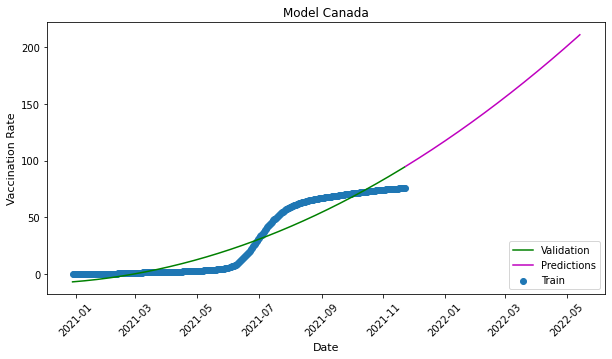

Observations in Actual Data = 329.000000, Predicted Observations=173.000000

 ------------- ('CHE', 'Europe', 'Switzerland') --------------
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749
('CHE', 'Europe', 'Switzerland')
rmse:  5.071552789494512
r2:  0.9564388163883749


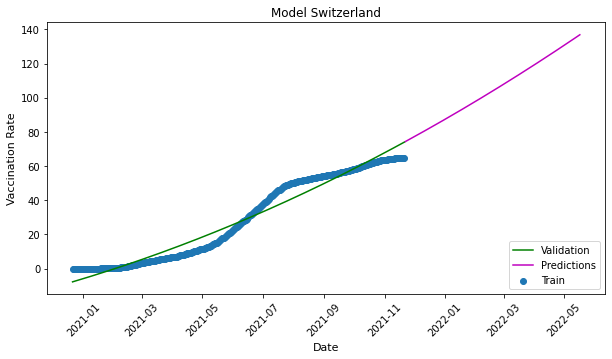

Observations in Actual Data = 336.000000, Predicted Observations=177.000000

 ------------- ('CHL', 'South America', 'Chile') --------------
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665
('CHL', 'South America', 'Chile')
rmse:  3.545216854545706
r2:  0.9842132239326665


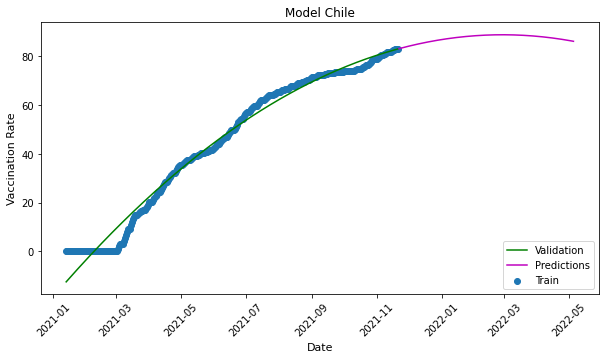

Observations in Actual Data = 313.000000, Predicted Observations=165.000000

 ------------- ('CHN', 'Asia', 'China') --------------

 ------------- ('CIV', 'Africa', "Cote d'Ivoire") --------------

 ------------- ('CMR', 'Africa', 'Cameroon') --------------

 ------------- ('COD', 'Africa', 'Democratic Republic of Congo') --------------

 ------------- ('COG', 'Africa', 'Congo') --------------

 ------------- ('COK', 'Oceania', 'Cook Islands') --------------

 ------------- ('COL', 'South America', 'Colombia') --------------
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867
('COL', 'South America', 'Colombia')
rmse:  1.871429639676104
r2:  0.9842247499741867


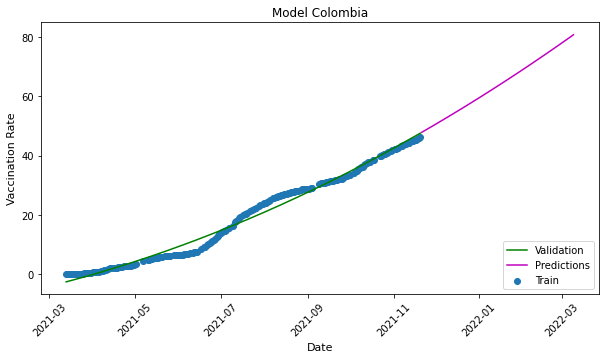

Observations in Actual Data = 200.000000, Predicted Observations=109.000000

 ------------- ('COM', 'Africa', 'Comoros') --------------

 ------------- ('CPV', 'Africa', 'Cape Verde') --------------

 ------------- ('CRI', 'North America', 'Costa Rica') --------------

 ------------- ('CUB', 'North America', 'Cuba') --------------
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644
('CUB', 'North America', 'Cuba')
rmse:  1.9304763740967086
r2:  0.9924667610964644


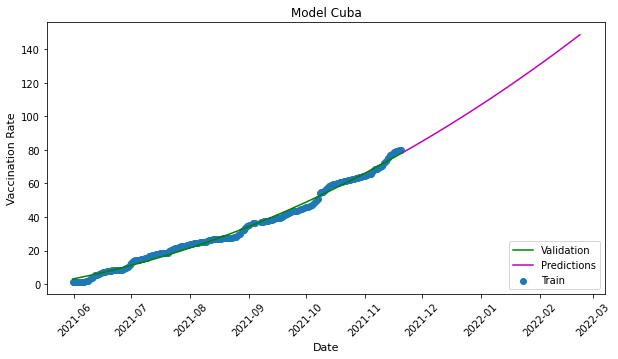

Observations in Actual Data = 170.000000, Predicted Observations=94.000000

 ------------- ('CUW', 'North America', 'Curacao') --------------
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915
('CUW', 'North America', 'Curacao')
rmse:  4.086126126939669
r2:  0.9394929032149915


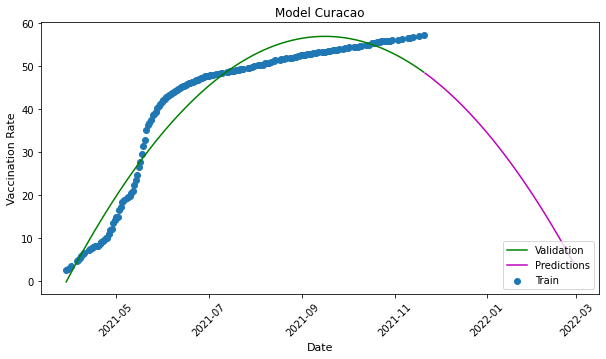

Observations in Actual Data = 180.000000, Predicted Observations=99.000000

 ------------- ('CYM', 'North America', 'Cayman Islands') --------------
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199
('CYM', 'North America', 'Cayman Islands')
rmse:  2.550894396059447
r2:  0.9883863971567199


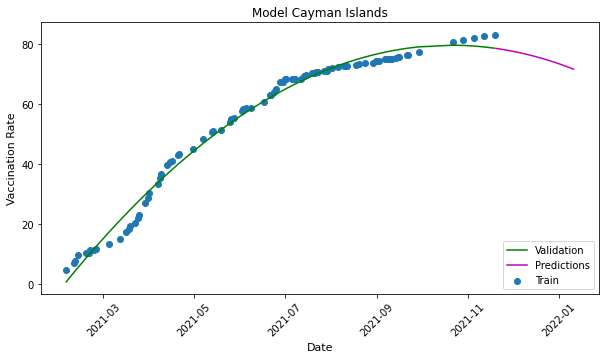

Observations in Actual Data = 88.000000, Predicted Observations=53.000000

 ------------- ('CYP', 'Europe', 'Cyprus') --------------
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791
('CYP', 'Europe', 'Cyprus')
rmse:  5.94207194705337
r2:  0.9225288412204791


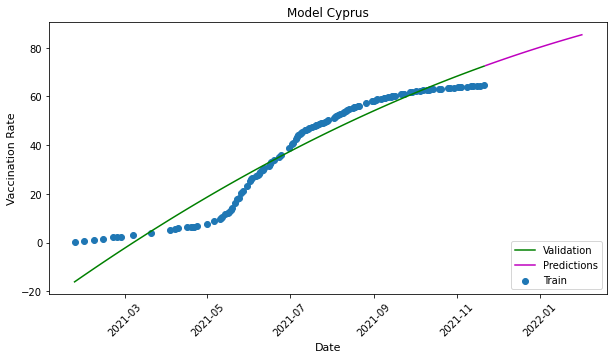

Observations in Actual Data = 126.000000, Predicted Observations=72.000000

 ------------- ('CZE', 'Europe', 'Czechia') --------------
('CZE', 'Europe', 'Czechia')
rmse:  5.699555764968964
r2:  0.937652341347124
('CZE', 'Europe', 'Czechia')
rmse:  5.699555764968964
r2:  0.937652341347124
('CZE', 'Europe', 'Czechia')
rmse:  5.699555764968964
r2:  0.937652341347124
('CZE', 'Europe', 'Czechia')
rmse:  5.699555764968964
r2:  0.937652341347124


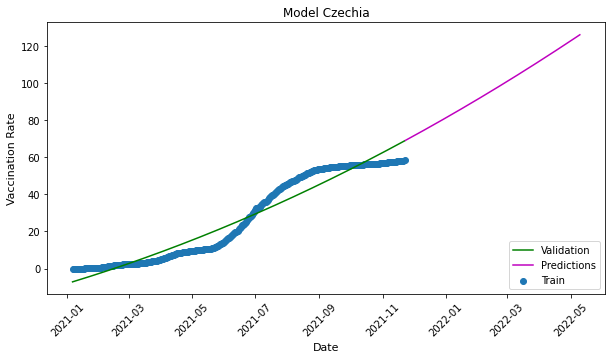

Observations in Actual Data = 321.000000, Predicted Observations=169.000000

 ------------- ('DEU', 'Europe', 'Germany') --------------
('DEU', 'Europe', 'Germany')
rmse:  6.58575272092447
r2:  0.9385130473482772
('DEU', 'Europe', 'Germany')
rmse:  6.58575272092447
r2:  0.9385130473482772
('DEU', 'Europe', 'Germany')
rmse:  6.58575272092447
r2:  0.9385130473482772
('DEU', 'Europe', 'Germany')
rmse:  6.58575272092447
r2:  0.9385130473482772


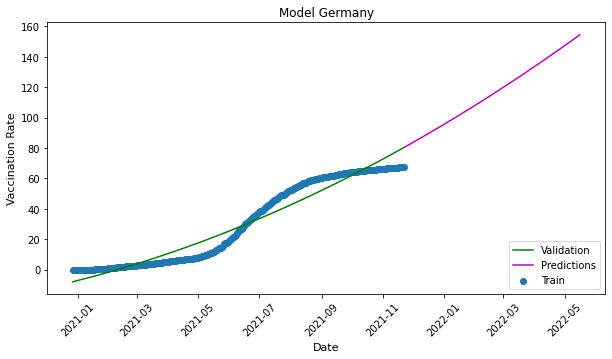

Observations in Actual Data = 331.000000, Predicted Observations=175.000000

 ------------- ('DJI', 'Africa', 'Djibouti') --------------

 ------------- ('DMA', 'North America', 'Dominica') --------------

 ------------- ('DNK', 'Europe', 'Denmark') --------------
('DNK', 'Europe', 'Denmark')
rmse:  7.090768534708359
r2:  0.9446649230781883
('DNK', 'Europe', 'Denmark')
rmse:  7.090768534708359
r2:  0.9446649230781883
('DNK', 'Europe', 'Denmark')
rmse:  7.090768534708359
r2:  0.9446649230781883
('DNK', 'Europe', 'Denmark')
rmse:  7.090768534708359
r2:  0.9446649230781883


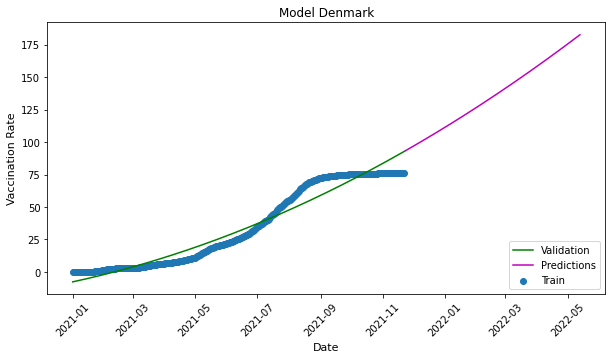

Observations in Actual Data = 326.000000, Predicted Observations=172.000000

 ------------- ('DOM', 'North America', 'Dominican Republic') --------------
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559
('DOM', 'North America', 'Dominican Republic')
rmse:  2.721643121806932
r2:  0.9677227085277559


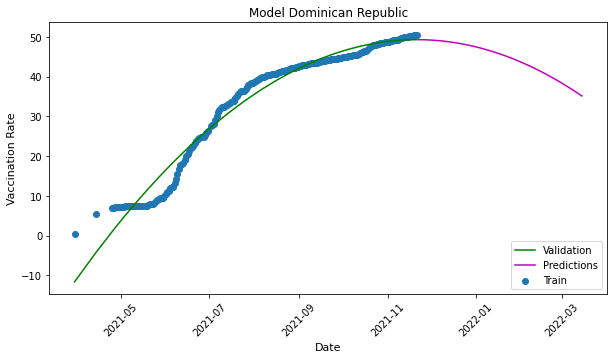

Observations in Actual Data = 210.000000, Predicted Observations=114.000000

 ------------- ('DZA', 'Africa', 'Algeria') --------------

 ------------- ('ECU', 'South America', 'Ecuador') --------------
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406
('ECU', 'South America', 'Ecuador')
rmse:  5.908774195510161
r2:  0.9351067652358406


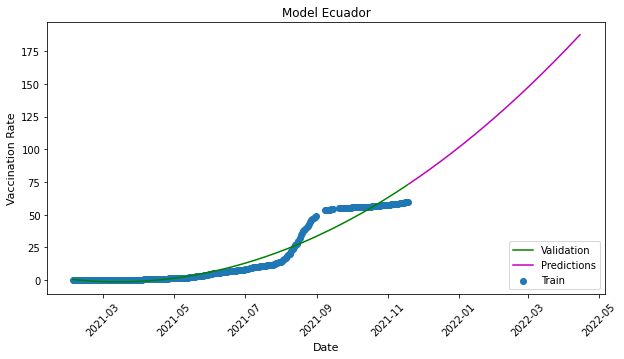

Observations in Actual Data = 278.000000, Predicted Observations=148.000000

 ------------- ('EGY', 'Africa', 'Egypt') --------------

 ------------- ('ERI', 'Africa', 'Eritrea') --------------

 ------------- ('ESP', 'Europe', 'Spain') --------------
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093
('ESP', 'Europe', 'Spain')
rmse:  6.985785305465231
r2:  0.9496128012714093


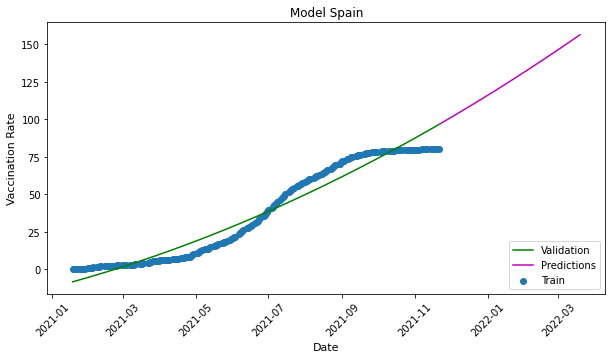

Observations in Actual Data = 218.000000, Predicted Observations=118.000000

 ------------- ('EST', 'Europe', 'Estonia') --------------
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777
('EST', 'Europe', 'Estonia')
rmse:  4.126814316316437
r2:  0.9639731709685777


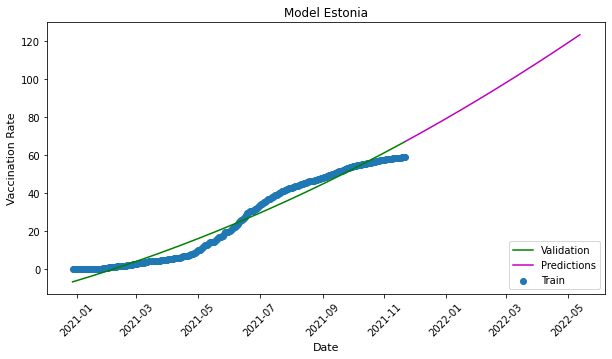

Observations in Actual Data = 329.000000, Predicted Observations=173.000000

 ------------- ('ETH', 'Africa', 'Ethiopia') --------------
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627
('ETH', 'Africa', 'Ethiopia')
rmse:  0.04025635887238471
r2:  0.97263808345627


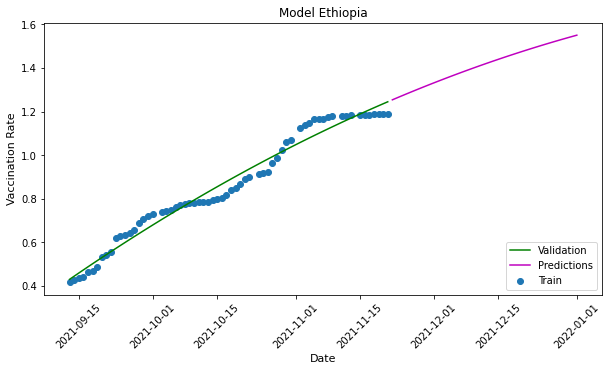

Observations in Actual Data = 65.000000, Predicted Observations=41.000000

 ------------- ('FIN', 'Europe', 'Finland') --------------
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872
('FIN', 'Europe', 'Finland')
rmse:  4.256182650470096
r2:  0.9742813028693872


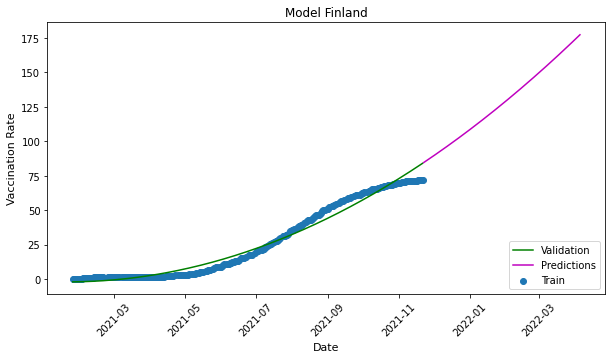

Observations in Actual Data = 253.000000, Predicted Observations=135.000000

 ------------- ('FJI', 'Oceania', 'Fiji') --------------

 ------------- ('FLK', 'South America', 'Falkland Islands') --------------

 ------------- ('FRA', 'Europe', 'France') --------------
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797
('FRA', 'Europe', 'France')
rmse:  5.408255141628385
r2:  0.9579165253688797


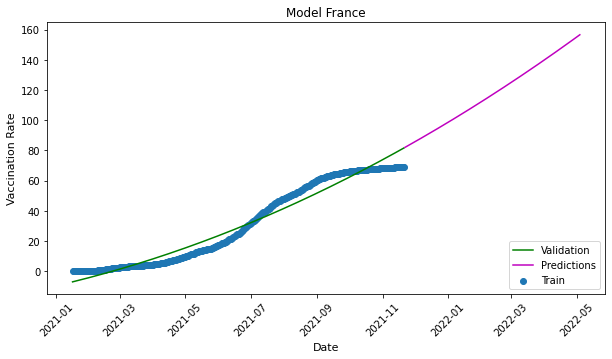

Observations in Actual Data = 310.000000, Predicted Observations=164.000000

 ------------- ('FRO', 'Europe', 'Faeroe Islands') --------------
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836
('FRO', 'Europe', 'Faeroe Islands')
rmse:  6.3953713130289795
r2:  0.9443201085237836


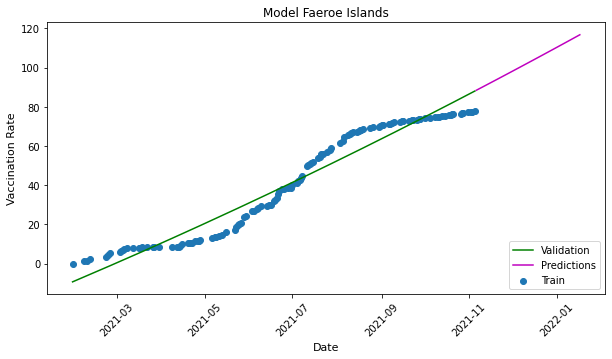

Observations in Actual Data = 129.000000, Predicted Observations=73.000000

 ------------- ('FSM', 'Oceania', 'Micronesia (country)') --------------

 ------------- ('GAB', 'Africa', 'Gabon') --------------

 ------------- ('GBR', 'Europe', 'United Kingdom') --------------
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529
('GBR', 'Europe', 'United Kingdom')
rmse:  5.428431296751917
r2:  0.956791912442529


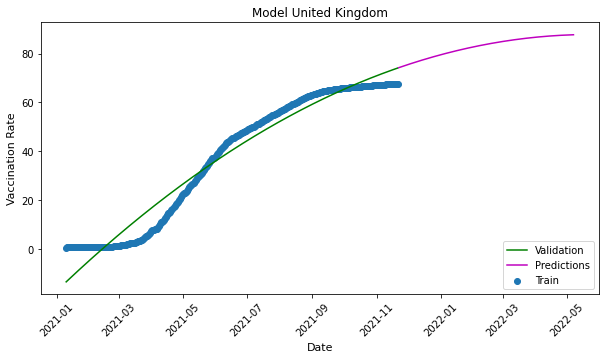

Observations in Actual Data = 316.000000, Predicted Observations=167.000000

 ------------- ('GEO', 'Asia', 'Georgia') --------------
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291
('GEO', 'Asia', 'Georgia')
rmse:  1.8975691202794647
r2:  0.9522365336571291


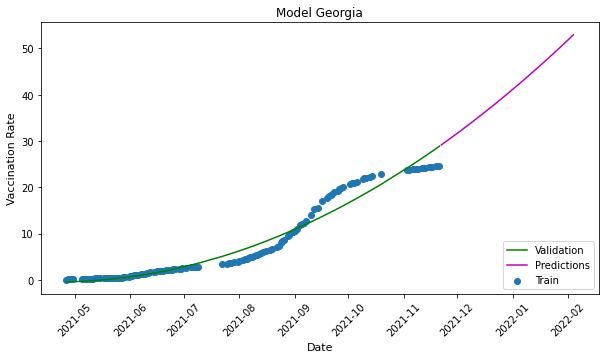

Observations in Actual Data = 133.000000, Predicted Observations=75.000000

 ------------- ('GGY', 'Europe', 'Guernsey') --------------

 ------------- ('GHA', 'Africa', 'Ghana') --------------

 ------------- ('GIB', 'Europe', 'Gibraltar') --------------
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713
('GIB', 'Europe', 'Gibraltar')
rmse:  7.311568169025214
r2:  0.9590309283540713


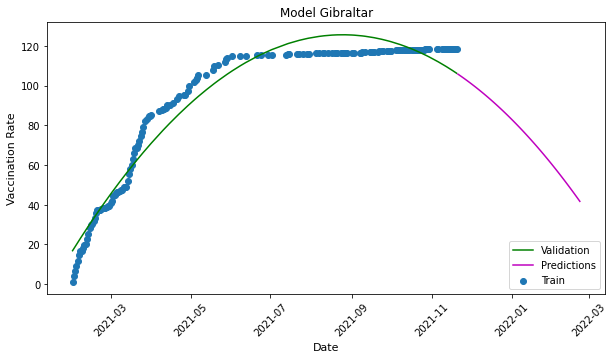

Observations in Actual Data = 170.000000, Predicted Observations=94.000000

 ------------- ('GIN', 'Africa', 'Guinea') --------------
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187
('GIN', 'Africa', 'Guinea')
rmse:  0.17663112199138853
r2:  0.9887065331145187


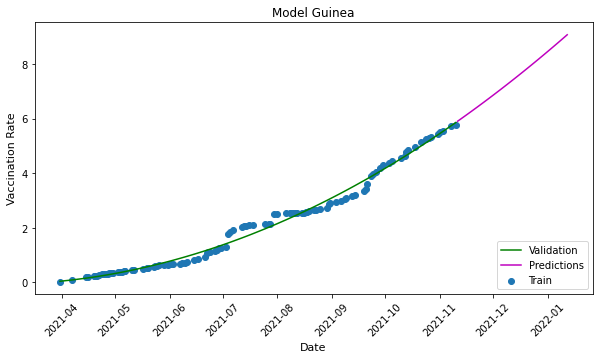

Observations in Actual Data = 108.000000, Predicted Observations=63.000000

 ------------- ('GMB', 'Africa', 'Gambia') --------------

 ------------- ('GNB', 'Africa', 'Guinea-Bissau') --------------

 ------------- ('GNQ', 'Africa', 'Equatorial Guinea') --------------
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372
('GNQ', 'Africa', 'Equatorial Guinea')
rmse:  0.6002857767504883
r2:  0.9764721243752372


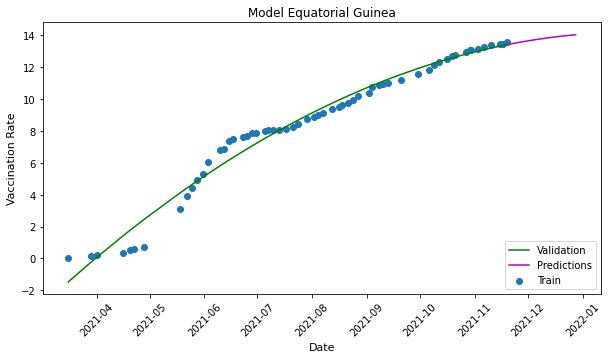

Observations in Actual Data = 60.000000, Predicted Observations=39.000000

 ------------- ('GRC', 'Europe', 'Greece') --------------
('GRC', 'Europe', 'Greece')
rmse:  5.303885077199666
r2:  0.9501068916814494
('GRC', 'Europe', 'Greece')
rmse:  5.303885077199666
r2:  0.9501068916814494
('GRC', 'Europe', 'Greece')
rmse:  5.303885077199666
r2:  0.9501068916814494
('GRC', 'Europe', 'Greece')
rmse:  5.303885077199666
r2:  0.9501068916814494


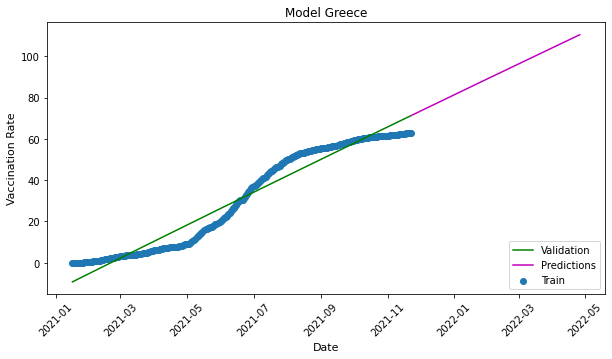

Observations in Actual Data = 292.000000, Predicted Observations=155.000000

 ------------- ('GRD', 'North America', 'Grenada') --------------

 ------------- ('GRL', 'North America', 'Greenland') --------------
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073
('GRL', 'North America', 'Greenland')
rmse:  5.074384534256797
r2:  0.936213272654073


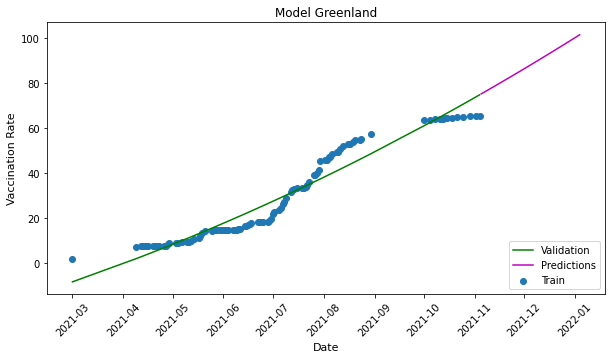

Observations in Actual Data = 105.000000, Predicted Observations=61.000000

 ------------- ('GTM', 'North America', 'Guatemala') --------------
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441
('GTM', 'North America', 'Guatemala')
rmse:  1.036281540894469
r2:  0.9787000327169441


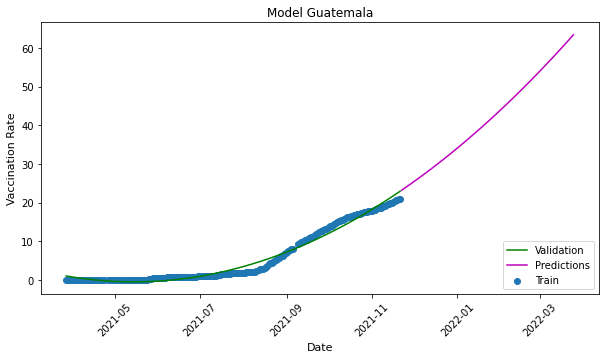

Observations in Actual Data = 230.000000, Predicted Observations=124.000000

 ------------- ('GUY', 'South America', 'Guyana') --------------
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352
('GUY', 'South America', 'Guyana')
rmse:  1.1223350677482582
r2:  0.9836186968861352


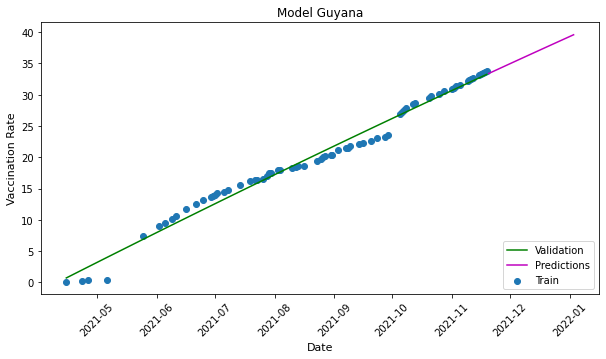

Observations in Actual Data = 71.000000, Predicted Observations=45.000000

 ------------- ('HKG', 'Asia', 'Hong Kong') --------------
('HKG', 'Asia', 'Hong Kong')
rmse:  3.2151845298555113
r2:  0.97773958795598
('HKG', 'Asia', 'Hong Kong')
rmse:  3.2151845298555113
r2:  0.97773958795598
('HKG', 'Asia', 'Hong Kong')
rmse:  3.2151845298555113
r2:  0.97773958795598
('HKG', 'Asia', 'Hong Kong')
rmse:  3.2151845298555113
r2:  0.97773958795598


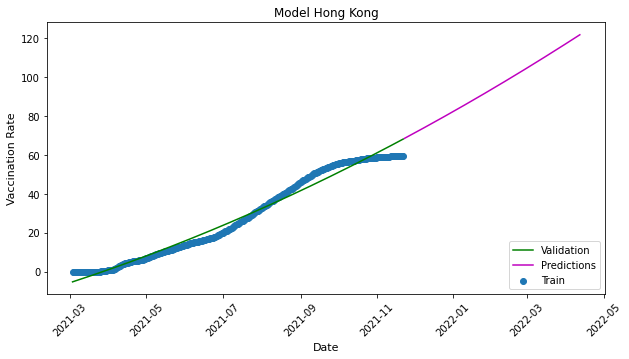

Observations in Actual Data = 265.000000, Predicted Observations=141.000000

 ------------- ('HND', 'North America', 'Honduras') --------------

 ------------- ('HRV', 'Europe', 'Croatia') --------------
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277
('HRV', 'Europe', 'Croatia')
rmse:  4.7825571942127345
r2:  0.916945261216277


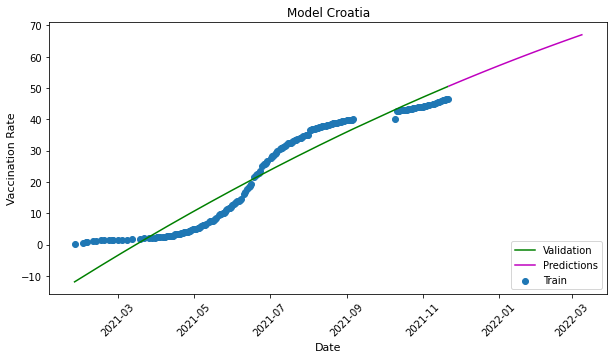

Observations in Actual Data = 198.000000, Predicted Observations=108.000000

 ------------- ('HTI', 'North America', 'Haiti') --------------

 ------------- ('HUN', 'Europe', 'Hungary') --------------
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884
('HUN', 'Europe', 'Hungary')
rmse:  5.395116200353581
r2:  0.9487733343584884


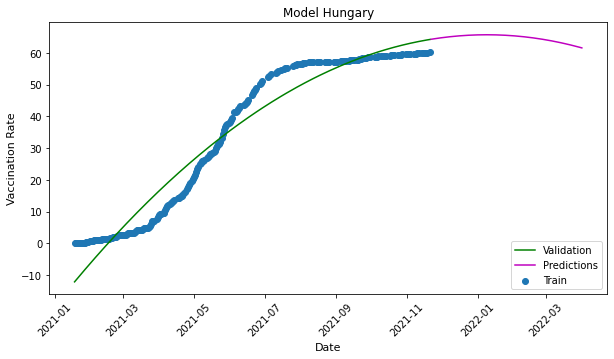

Observations in Actual Data = 243.000000, Predicted Observations=131.000000

 ------------- ('IDN', 'Asia', 'Indonesia') --------------
('IDN', 'Asia', 'Indonesia')
rmse:  1.0460389384776956
r2:  0.9874899855530948
('IDN', 'Asia', 'Indonesia')
rmse:  1.0460389384776956
r2:  0.9874899855530948
('IDN', 'Asia', 'Indonesia')
rmse:  1.0460389384776956
r2:  0.9874899855530948
('IDN', 'Asia', 'Indonesia')
rmse:  1.0460389384776956
r2:  0.9874899855530948


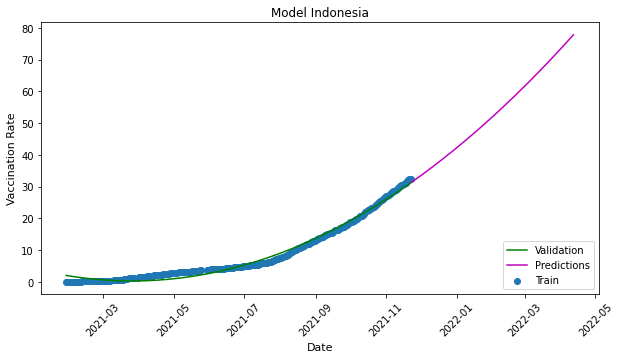

Observations in Actual Data = 264.000000, Predicted Observations=141.000000

 ------------- ('IMN', 'Europe', 'Isle of Man') --------------
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723
('IMN', 'Europe', 'Isle of Man')
rmse:  6.729084685637408
r2:  0.9398261907042723


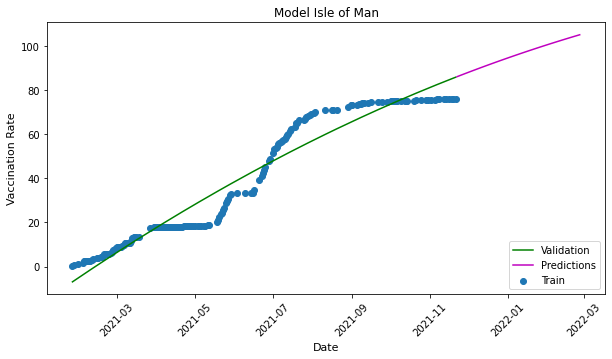

Observations in Actual Data = 175.000000, Predicted Observations=97.000000

 ------------- ('IND', 'Asia', 'India') --------------
('IND', 'Asia', 'India')
rmse:  0.7485015960760381
r2:  0.9918452973257951
('IND', 'Asia', 'India')
rmse:  0.7485015960760381
r2:  0.9918452973257951
('IND', 'Asia', 'India')
rmse:  0.7485015960760381
r2:  0.9918452973257951
('IND', 'Asia', 'India')
rmse:  0.7485015960760381
r2:  0.9918452973257951


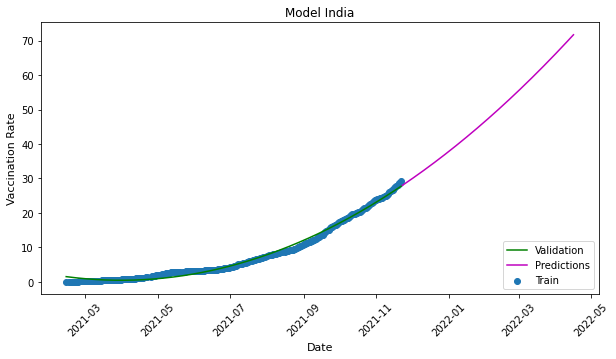

Observations in Actual Data = 272.000000, Predicted Observations=145.000000

 ------------- ('IRL', 'Europe', 'Ireland') --------------
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563
('IRL', 'Europe', 'Ireland')
rmse:  7.269023813848249
r2:  0.9416666965909563


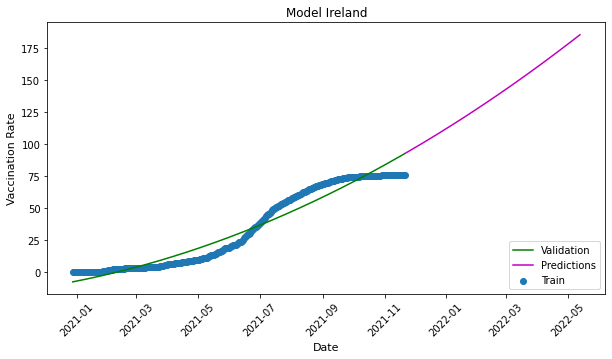

Observations in Actual Data = 327.000000, Predicted Observations=173.000000

 ------------- ('IRN', 'Asia', 'Iran') --------------

 ------------- ('IRQ', 'Asia', 'Iraq') --------------

 ------------- ('ISL', 'Europe', 'Iceland') --------------
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438
('ISL', 'Europe', 'Iceland')
rmse:  9.459763268805082
r2:  0.9105633235546438


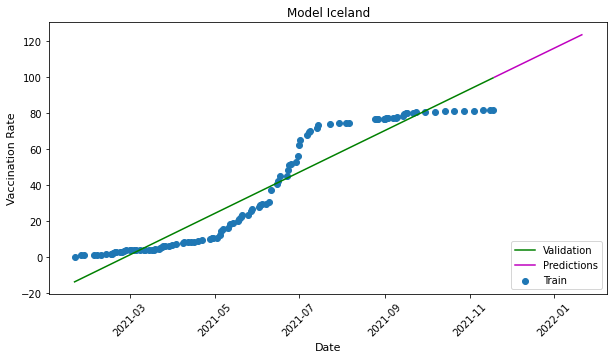

Observations in Actual Data = 110.000000, Predicted Observations=64.000000

 ------------- ('ISR', 'Asia', 'Israel') --------------
('ISR', 'Asia', 'Israel')
rmse:  5.3892839966360935
r2:  0.9189221598875237
('ISR', 'Asia', 'Israel')
rmse:  5.3892839966360935
r2:  0.9189221598875237
('ISR', 'Asia', 'Israel')
rmse:  5.3892839966360935
r2:  0.9189221598875237
('ISR', 'Asia', 'Israel')
rmse:  5.3892839966360935
r2:  0.9189221598875237


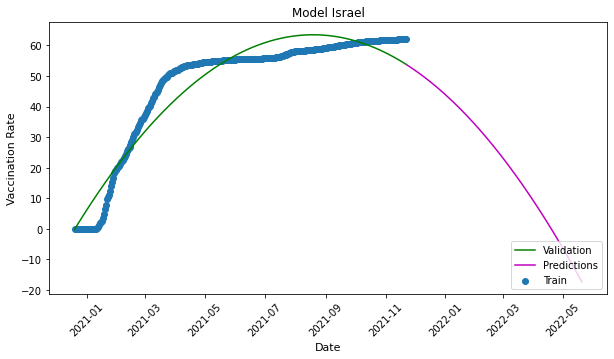

Observations in Actual Data = 339.000000, Predicted Observations=179.000000

 ------------- ('ITA', 'Europe', 'Italy') --------------
('ITA', 'Europe', 'Italy')
rmse:  5.57450216810939
r2:  0.9590111521983865
('ITA', 'Europe', 'Italy')
rmse:  5.57450216810939
r2:  0.9590111521983865
('ITA', 'Europe', 'Italy')
rmse:  5.57450216810939
r2:  0.9590111521983865
('ITA', 'Europe', 'Italy')
rmse:  5.57450216810939
r2:  0.9590111521983865


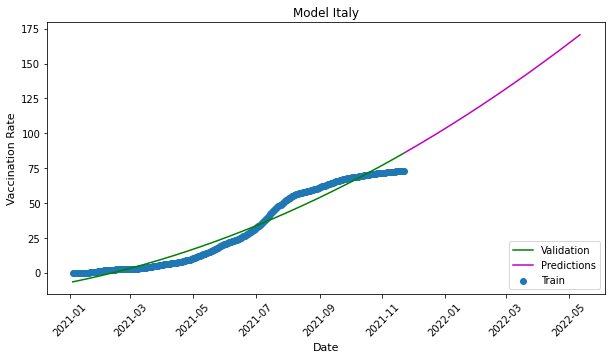

Observations in Actual Data = 323.000000, Predicted Observations=171.000000

 ------------- ('JAM', 'North America', 'Jamaica') --------------
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057
('JAM', 'North America', 'Jamaica')
rmse:  0.6657828937828617
r2:  0.9812041501546057


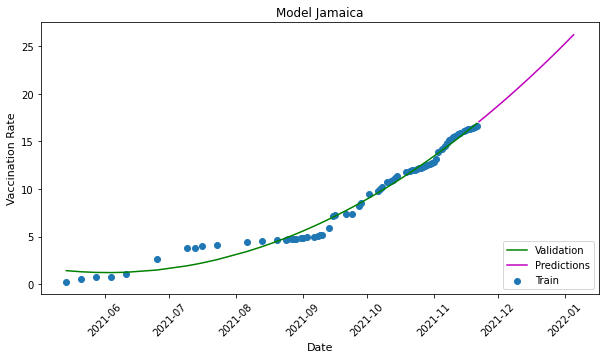

Observations in Actual Data = 72.000000, Predicted Observations=45.000000

 ------------- ('JEY', 'Europe', 'Jersey') --------------
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125
('JEY', 'Europe', 'Jersey')
rmse:  1.5481955129317118
r2:  0.9928631746972125


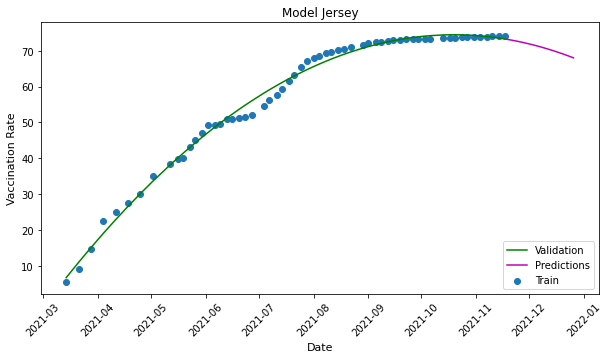

Observations in Actual Data = 60.000000, Predicted Observations=39.000000

 ------------- ('JOR', 'Asia', 'Jordan') --------------
('JOR', 'Asia', 'Jordan')
rmse:  2.5345172972478234
r2:  0.9475557157872373
('JOR', 'Asia', 'Jordan')
rmse:  2.5345172972478234
r2:  0.9475557157872373
('JOR', 'Asia', 'Jordan')
rmse:  2.5345172972478234
r2:  0.9475557157872373
('JOR', 'Asia', 'Jordan')
rmse:  2.5345172972478234
r2:  0.9475557157872373


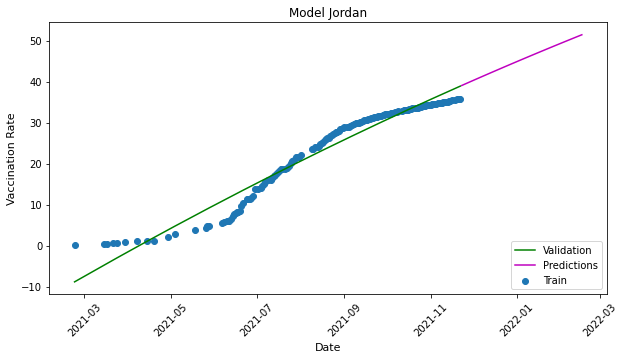

Observations in Actual Data = 154.000000, Predicted Observations=86.000000

 ------------- ('JPN', 'Asia', 'Japan') --------------
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344
('JPN', 'Asia', 'Japan')
rmse:  3.59664680018204
r2:  0.9808914803109344


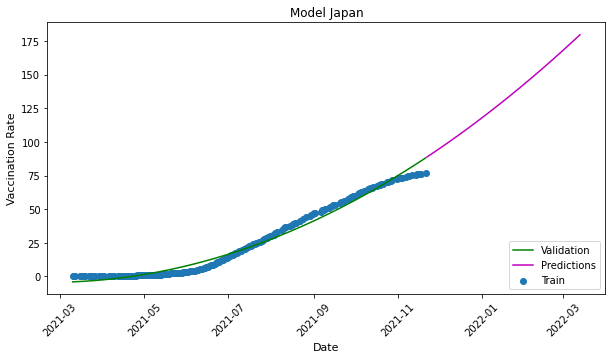

Observations in Actual Data = 206.000000, Predicted Observations=112.000000

 ------------- ('KAZ', 'Asia', 'Kazakhstan') --------------
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0756478874359106
r2:  0.9765584892694821
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0756478874359106
r2:  0.9765584892694821
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0756478874359106
r2:  0.9765584892694821
('KAZ', 'Asia', 'Kazakhstan')
rmse:  2.0756478874359106
r2:  0.9765584892694821


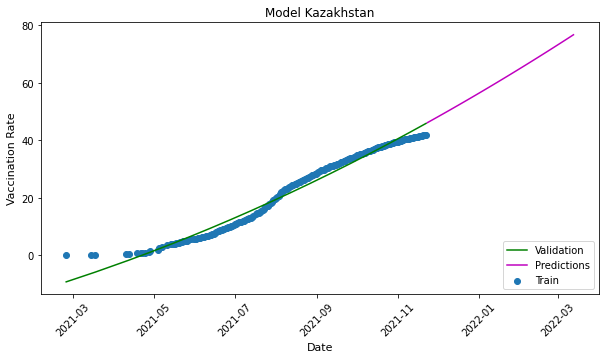

Observations in Actual Data = 205.000000, Predicted Observations=111.000000

 ------------- ('KEN', 'Africa', 'Kenya') --------------
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022
('KEN', 'Africa', 'Kenya')
rmse:  0.2843831956784675
r2:  0.9122603192546022


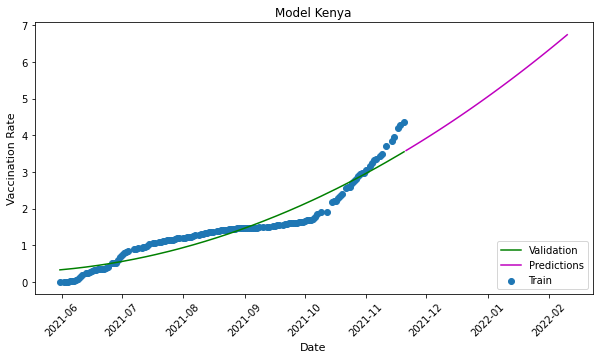

Observations in Actual Data = 146.000000, Predicted Observations=82.000000

 ------------- ('KGZ', 'Asia', 'Kyrgyzstan') --------------
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8634899882601332
r2:  0.9402233756746015
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8634899882601332
r2:  0.9402233756746015
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8634899882601332
r2:  0.9402233756746015
('KGZ', 'Asia', 'Kyrgyzstan')
rmse:  0.8634899882601332
r2:  0.9402233756746015


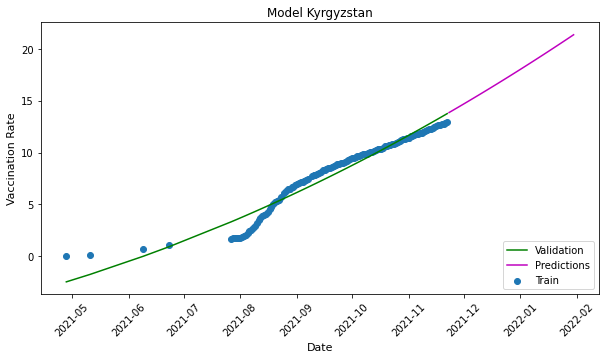

Observations in Actual Data = 121.000000, Predicted Observations=69.000000

 ------------- ('KHM', 'Asia', 'Cambodia') --------------
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742
('KHM', 'Asia', 'Cambodia')
rmse:  3.627265858773287
r2:  0.983004435335742


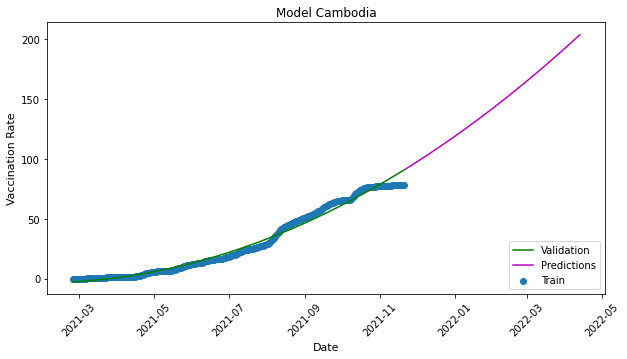

Observations in Actual Data = 267.000000, Predicted Observations=143.000000

 ------------- ('KIR', 'Oceania', 'Kiribati') --------------

 ------------- ('KNA', 'North America', 'Saint Kitts and Nevis') --------------

 ------------- ('KOR', 'Asia', 'South Korea') --------------
('KOR', 'Asia', 'South Korea')
rmse:  2.9414497688430448
r2:  0.9876695752362676
('KOR', 'Asia', 'South Korea')
rmse:  2.9414497688430448
r2:  0.9876695752362676
('KOR', 'Asia', 'South Korea')
rmse:  2.9414497688430448
r2:  0.9876695752362676
('KOR', 'Asia', 'South Korea')
rmse:  2.9414497688430448
r2:  0.9876695752362676


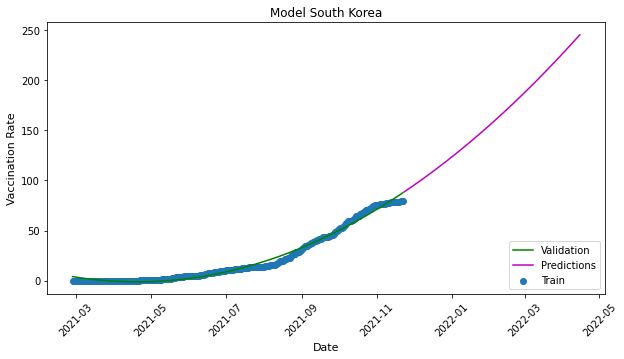

Observations in Actual Data = 270.000000, Predicted Observations=144.000000

 ------------- ('KWT', 'Asia', 'Kuwait') --------------

 ------------- ('LAO', 'Asia', 'Laos') --------------
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132
('LAO', 'Asia', 'Laos')
rmse:  1.3948604260730806
r2:  0.9822837844961132


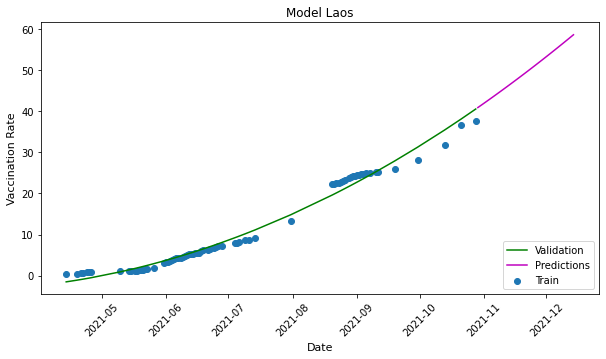

Observations in Actual Data = 75.000000, Predicted Observations=47.000000

 ------------- ('LBN', 'Asia', 'Lebanon') --------------
('LBN', 'Asia', 'Lebanon')
rmse:  1.036619363618102
r2:  0.9826949431977516
('LBN', 'Asia', 'Lebanon')
rmse:  1.036619363618102
r2:  0.9826949431977516
('LBN', 'Asia', 'Lebanon')
rmse:  1.036619363618102
r2:  0.9826949431977516
('LBN', 'Asia', 'Lebanon')
rmse:  1.036619363618102
r2:  0.9826949431977516


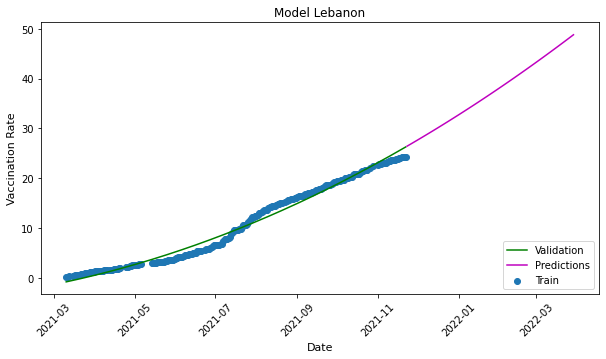

Observations in Actual Data = 236.000000, Predicted Observations=127.000000

 ------------- ('LBR', 'Africa', 'Liberia') --------------

 ------------- ('LBY', 'Africa', 'Libya') --------------

 ------------- ('LCA', 'North America', 'Saint Lucia') --------------
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225
('LCA', 'North America', 'Saint Lucia')
rmse:  0.5082945384192129
r2:  0.985273526319225


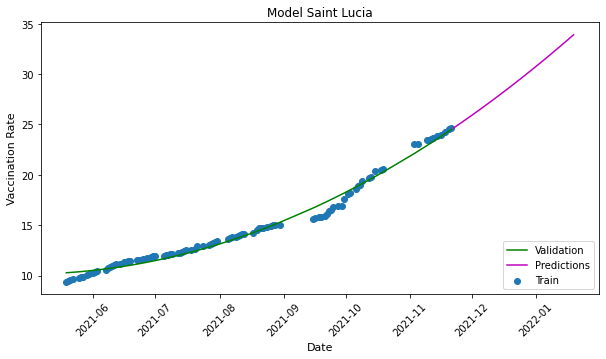

Observations in Actual Data = 101.000000, Predicted Observations=59.000000

 ------------- ('LIE', 'Europe', 'Liechtenstein') --------------
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356
('LIE', 'Europe', 'Liechtenstein')
rmse:  4.409047406194049
r2:  0.9651894100485356


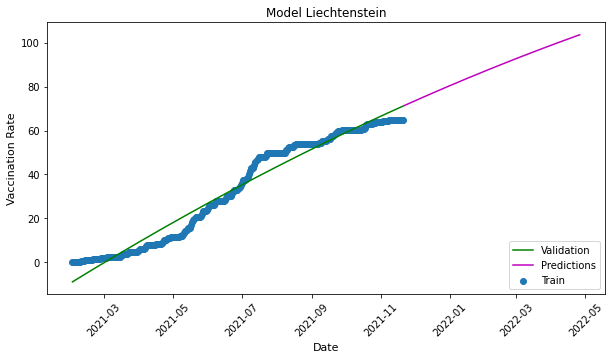

Observations in Actual Data = 294.000000, Predicted Observations=156.000000

 ------------- ('LKA', 'Asia', 'Sri Lanka') --------------
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.435029783788656
r2:  0.9348683868931194
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.435029783788656
r2:  0.9348683868931194
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.435029783788656
r2:  0.9348683868931194
('LKA', 'Asia', 'Sri Lanka')
rmse:  6.435029783788656
r2:  0.9348683868931194


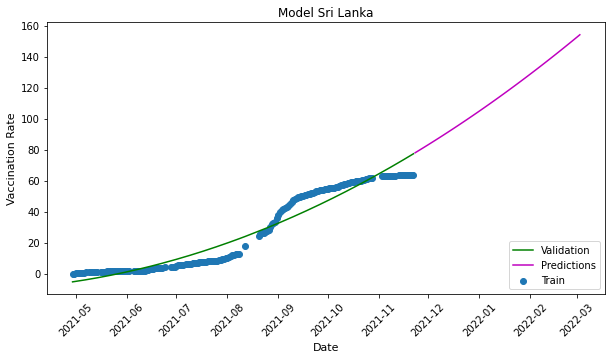

Observations in Actual Data = 183.000000, Predicted Observations=101.000000

 ------------- ('LSO', 'Africa', 'Lesotho') --------------

 ------------- ('LTU', 'Europe', 'Lithuania') --------------
('LTU', 'Europe', 'Lithuania')
rmse:  4.5610926449406
r2:  0.9643207917960499
('LTU', 'Europe', 'Lithuania')
rmse:  4.5610926449406
r2:  0.9643207917960499
('LTU', 'Europe', 'Lithuania')
rmse:  4.5610926449406
r2:  0.9643207917960499
('LTU', 'Europe', 'Lithuania')
rmse:  4.5610926449406
r2:  0.9643207917960499


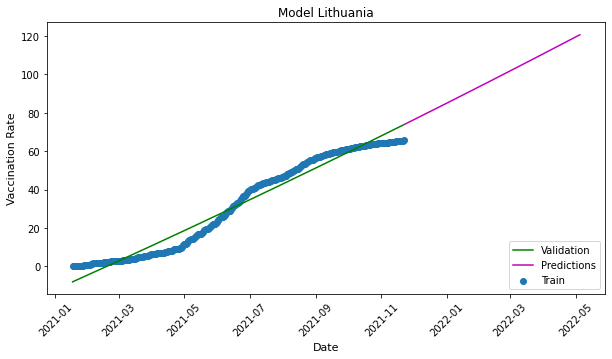

Observations in Actual Data = 310.000000, Predicted Observations=164.000000

 ------------- ('LUX', 'Europe', 'Luxembourg') --------------
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474
('LUX', 'Europe', 'Luxembourg')
rmse:  0.25532966933165524
r2:  0.9988359261637474


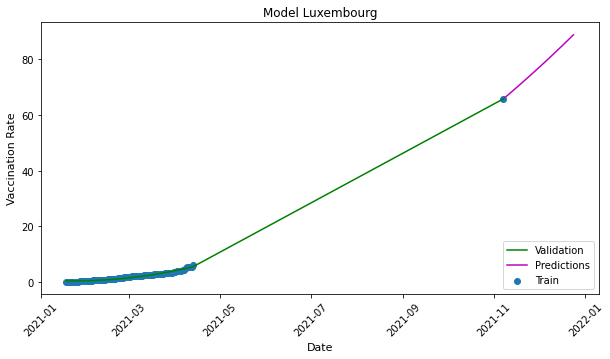

Observations in Actual Data = 75.000000, Predicted Observations=47.000000

 ------------- ('LVA', 'Europe', 'Latvia') --------------
('LVA', 'Europe', 'Latvia')
rmse:  4.359166294925171
r2:  0.9561948276380726
('LVA', 'Europe', 'Latvia')
rmse:  4.359166294925171
r2:  0.9561948276380726
('LVA', 'Europe', 'Latvia')
rmse:  4.359166294925171
r2:  0.9561948276380726
('LVA', 'Europe', 'Latvia')
rmse:  4.359166294925171
r2:  0.9561948276380726


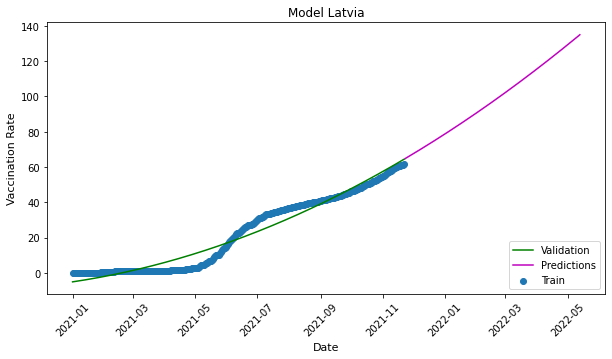

Observations in Actual Data = 326.000000, Predicted Observations=172.000000

 ------------- ('MAC', 'Asia', 'Macao') --------------
('MAC', 'Asia', 'Macao')
rmse:  3.150389279568641
r2:  0.9540594938846778
('MAC', 'Asia', 'Macao')
rmse:  3.150389279568641
r2:  0.9540594938846778
('MAC', 'Asia', 'Macao')
rmse:  3.150389279568641
r2:  0.9540594938846778
('MAC', 'Asia', 'Macao')
rmse:  3.150389279568641
r2:  0.9540594938846778


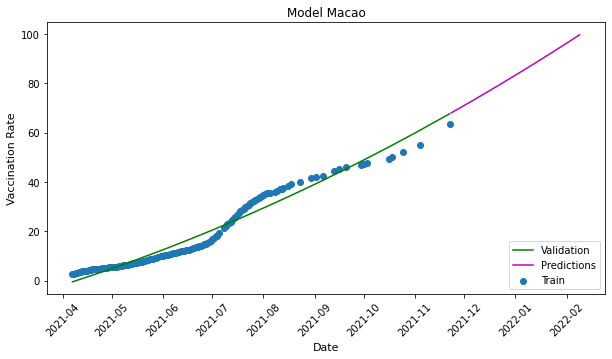

Observations in Actual Data = 141.000000, Predicted Observations=79.000000

 ------------- ('MAR', 'Africa', 'Morocco') --------------
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438
('MAR', 'Africa', 'Morocco')
rmse:  2.1013791840379343
r2:  0.981672228401438


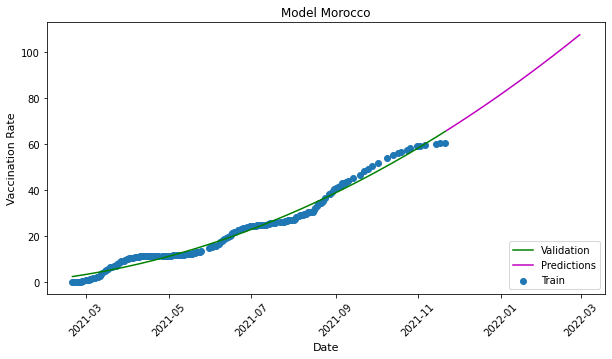

Observations in Actual Data = 181.000000, Predicted Observations=99.000000

 ------------- ('MCO', 'Europe', 'Monaco') --------------

 ------------- ('MDA', 'Europe', 'Moldova') --------------
('MDA', 'Europe', 'Moldova')
rmse:  1.0380411000439294
r2:  0.9851166889864862
('MDA', 'Europe', 'Moldova')
rmse:  1.0380411000439294
r2:  0.9851166889864862
('MDA', 'Europe', 'Moldova')
rmse:  1.0380411000439294
r2:  0.9851166889864862
('MDA', 'Europe', 'Moldova')
rmse:  1.0380411000439294
r2:  0.9851166889864862


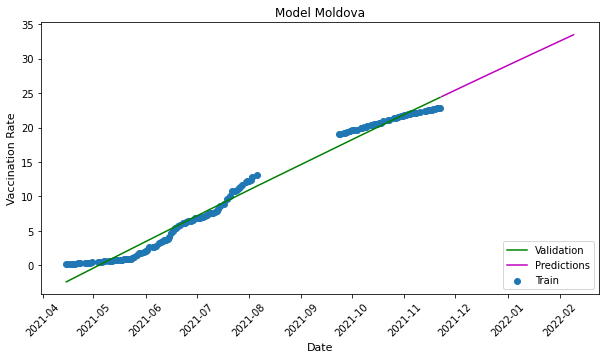

Observations in Actual Data = 139.000000, Predicted Observations=79.000000

 ------------- ('MDG', 'Africa', 'Madagascar') --------------

 ------------- ('MDV', 'Asia', 'Maldives') --------------
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727
('MDV', 'Asia', 'Maldives')
rmse:  2.2384572876252546
r2:  0.9858572271099727


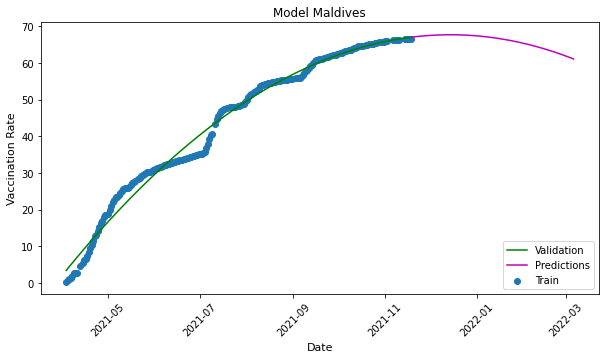

Observations in Actual Data = 198.000000, Predicted Observations=108.000000

 ------------- ('MEX', 'North America', 'Mexico') --------------
('MEX', 'North America', 'Mexico')
rmse:  0.845773838118814
r2:  0.9967018391975871
('MEX', 'North America', 'Mexico')
rmse:  0.845773838118814
r2:  0.9967018391975871
('MEX', 'North America', 'Mexico')
rmse:  0.845773838118814
r2:  0.9967018391975871
('MEX', 'North America', 'Mexico')
rmse:  0.845773838118814
r2:  0.9967018391975871


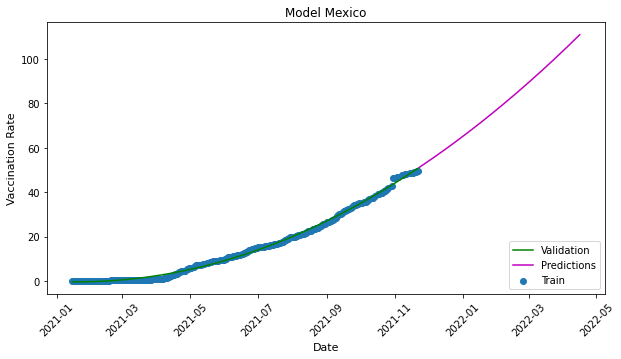

Observations in Actual Data = 273.000000, Predicted Observations=145.000000

 ------------- ('MHL', 'Oceania', 'Marshall Islands') --------------

 ------------- ('MKD', 'Europe', 'North Macedonia') --------------
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997
('MKD', 'Europe', 'North Macedonia')
rmse:  1.514732125330816
r2:  0.9846033601616997


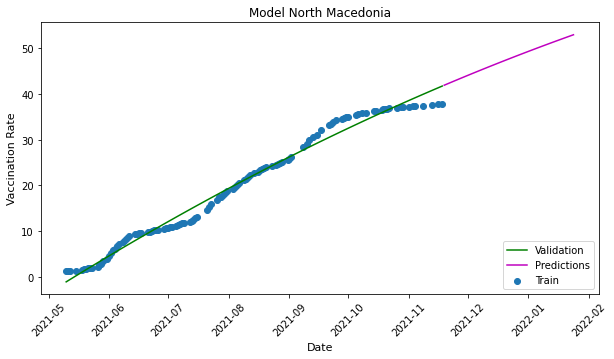

Observations in Actual Data = 116.000000, Predicted Observations=67.000000

 ------------- ('MLI', 'Africa', 'Mali') --------------

 ------------- ('MLT', 'Europe', 'Malta') --------------
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202
('MLT', 'Europe', 'Malta')
rmse:  7.263998680229389
r2:  0.9478784971170202


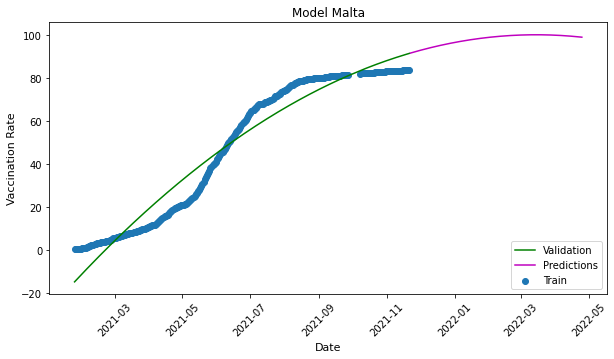

Observations in Actual Data = 292.000000, Predicted Observations=155.000000

 ------------- ('MMR', 'Asia', 'Myanmar') --------------

 ------------- ('MNE', 'Europe', 'Montenegro') --------------
('MNE', 'Europe', 'Montenegro')
rmse:  1.932245341199672
r2:  0.9782574829599403
('MNE', 'Europe', 'Montenegro')
rmse:  1.932245341199672
r2:  0.9782574829599403
('MNE', 'Europe', 'Montenegro')
rmse:  1.932245341199672
r2:  0.9782574829599403
('MNE', 'Europe', 'Montenegro')
rmse:  1.932245341199672
r2:  0.9782574829599403


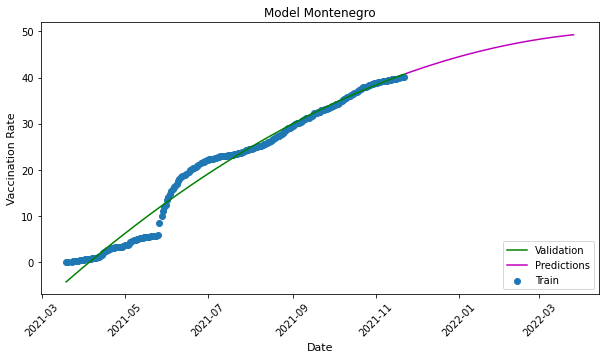

Observations in Actual Data = 230.000000, Predicted Observations=124.000000

 ------------- ('MNG', 'Asia', 'Mongolia') --------------
('MNG', 'Asia', 'Mongolia')
rmse:  3.88917952803609
r2:  0.9495893709704611
('MNG', 'Asia', 'Mongolia')
rmse:  3.88917952803609
r2:  0.9495893709704611
('MNG', 'Asia', 'Mongolia')
rmse:  3.88917952803609
r2:  0.9495893709704611
('MNG', 'Asia', 'Mongolia')
rmse:  3.88917952803609
r2:  0.9495893709704611


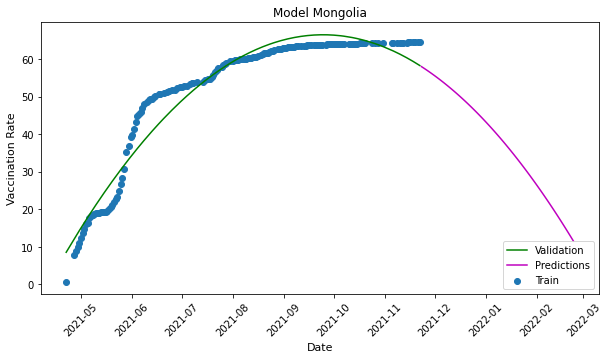

Observations in Actual Data = 168.000000, Predicted Observations=93.000000

 ------------- ('MOZ', 'Africa', 'Mozambique') --------------

 ------------- ('MRT', 'Africa', 'Mauritania') --------------

 ------------- ('MSR', 'North America', 'Montserrat') --------------

 ------------- ('MUS', 'Africa', 'Mauritius') --------------

 ------------- ('MWI', 'Africa', 'Malawi') --------------
('MWI', 'Africa', 'Malawi')
rmse:  0.21761504094608117
r2:  0.9542828638276464
('MWI', 'Africa', 'Malawi')
rmse:  0.21761504094608117
r2:  0.9542828638276464
('MWI', 'Africa', 'Malawi')
rmse:  0.21761504094608117
r2:  0.9542828638276464
('MWI', 'Africa', 'Malawi')
rmse:  0.21761504094608117
r2:  0.9542828638276464


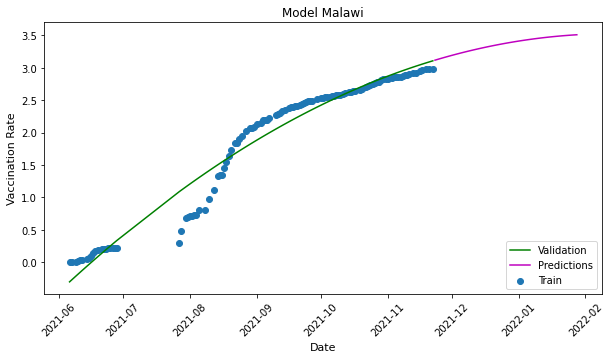

Observations in Actual Data = 116.000000, Predicted Observations=67.000000

 ------------- ('MYS', 'Asia', 'Malaysia') --------------
('MYS', 'Asia', 'Malaysia')
rmse:  5.042482632189175
r2:  0.9686681992555921
('MYS', 'Asia', 'Malaysia')
rmse:  5.042482632189175
r2:  0.9686681992555921
('MYS', 'Asia', 'Malaysia')
rmse:  5.042482632189175
r2:  0.9686681992555921
('MYS', 'Asia', 'Malaysia')
rmse:  5.042482632189175
r2:  0.9686681992555921


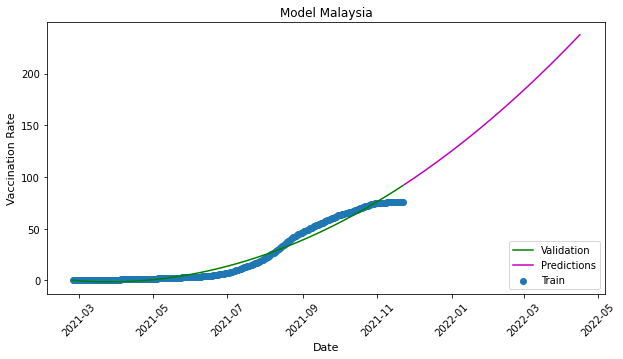

Observations in Actual Data = 272.000000, Predicted Observations=145.000000

 ------------- ('NAM', 'Africa', 'Namibia') --------------
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092
('NAM', 'Africa', 'Namibia')
rmse:  0.20523095899211688
r2:  0.9920182417988092


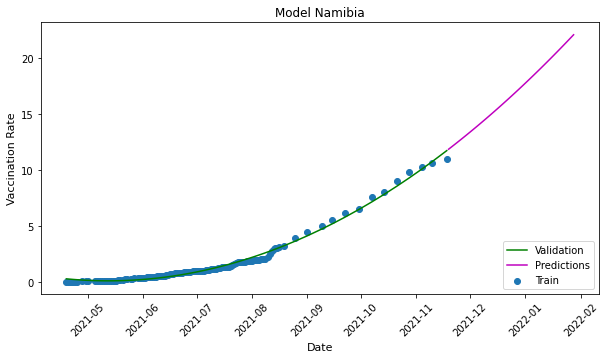

Observations in Actual Data = 123.000000, Predicted Observations=71.000000

 ------------- ('NCL', 'Oceania', 'New Caledonia') --------------

 ------------- ('NER', 'Africa', 'Niger') --------------

 ------------- ('NGA', 'Africa', 'Nigeria') --------------

 ------------- ('NIC', 'North America', 'Nicaragua') --------------

 ------------- ('NIU', 'Oceania', 'Niue') --------------

 ------------- ('NLD', 'Europe', 'Netherlands') --------------

 ------------- ('NOR', 'Europe', 'Norway') --------------
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814
('NOR', 'Europe', 'Norway')
rmse:  4.803473673554012
r2:  0.9652702186814814


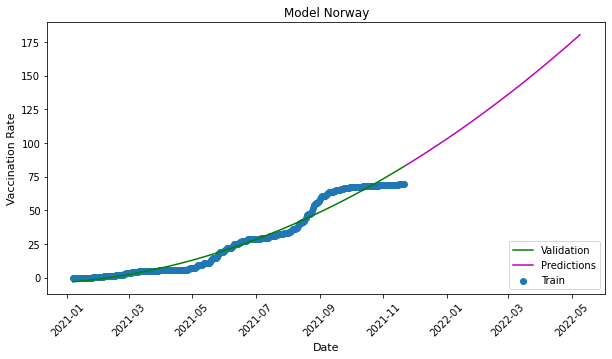

Observations in Actual Data = 320.000000, Predicted Observations=169.000000

 ------------- ('NPL', 'Asia', 'Nepal') --------------
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862
('NPL', 'Asia', 'Nepal')
rmse:  1.747382624604378
r2:  0.9493278668756862


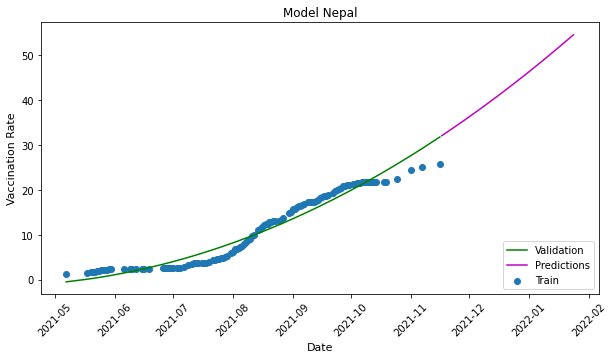

Observations in Actual Data = 121.000000, Predicted Observations=69.000000

 ------------- ('NRU', 'Oceania', 'Nauru') --------------

 ------------- ('NZL', 'Oceania', 'New Zealand') --------------
('NZL', 'Oceania', 'New Zealand')
rmse:  2.4362814266252415
r2:  0.9858656533819715
('NZL', 'Oceania', 'New Zealand')
rmse:  2.4362814266252415
r2:  0.9858656533819715
('NZL', 'Oceania', 'New Zealand')
rmse:  2.4362814266252415
r2:  0.9858656533819715
('NZL', 'Oceania', 'New Zealand')
rmse:  2.4362814266252415
r2:  0.9858656533819715


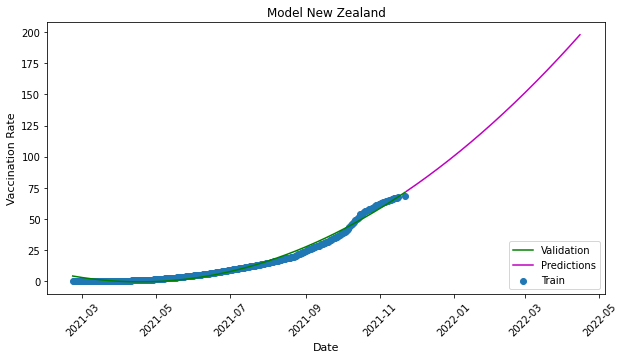

Observations in Actual Data = 270.000000, Predicted Observations=144.000000

 ------------- ('OMN', 'Asia', 'Oman') --------------
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925
('OMN', 'Asia', 'Oman')
rmse:  2.6368460532738767
r2:  0.9609661772070925


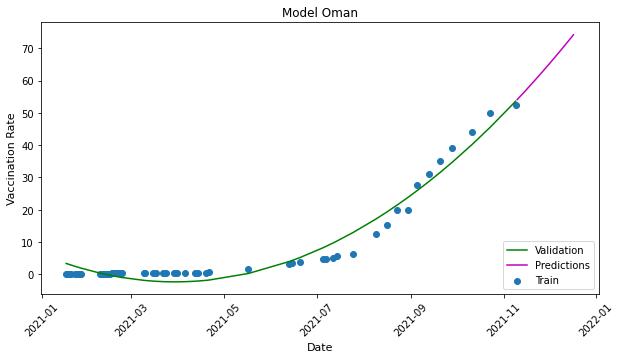

Observations in Actual Data = 58.000000, Predicted Observations=38.000000

 ------------- ('OWID_CYN', 'Asia', 'Northern Cyprus') --------------

 ------------- ('OWID_KOS', 'Europe', 'Kosovo') --------------
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272
('OWID_KOS', 'Europe', 'Kosovo')
rmse:  2.05819809630271
r2:  0.976234830511272


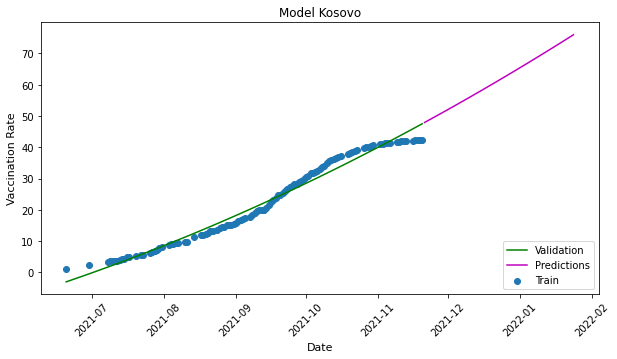

Observations in Actual Data = 113.000000, Predicted Observations=65.000000

 ------------- ('PAK', 'Asia', 'Pakistan') --------------
('PAK', 'Asia', 'Pakistan')
rmse:  0.4316928394004036
r2:  0.9963882915752871
('PAK', 'Asia', 'Pakistan')
rmse:  0.4316928394004036
r2:  0.9963882915752871
('PAK', 'Asia', 'Pakistan')
rmse:  0.4316928394004036
r2:  0.9963882915752871
('PAK', 'Asia', 'Pakistan')
rmse:  0.4316928394004036
r2:  0.9963882915752871


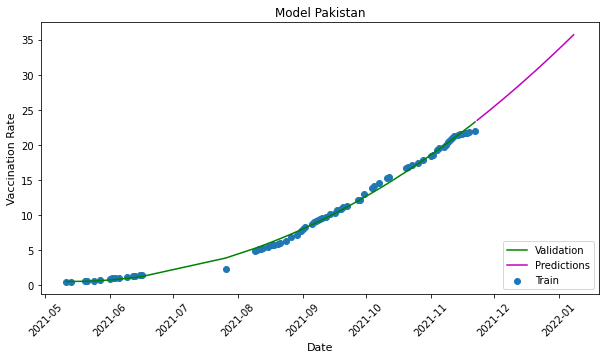

Observations in Actual Data = 75.000000, Predicted Observations=47.000000

 ------------- ('PAN', 'North America', 'Panama') --------------
('PAN', 'North America', 'Panama')
rmse:  4.921312723220522
r2:  0.94622006233581
('PAN', 'North America', 'Panama')
rmse:  4.921312723220522
r2:  0.94622006233581
('PAN', 'North America', 'Panama')
rmse:  4.921312723220522
r2:  0.94622006233581
('PAN', 'North America', 'Panama')
rmse:  4.921312723220522
r2:  0.94622006233581


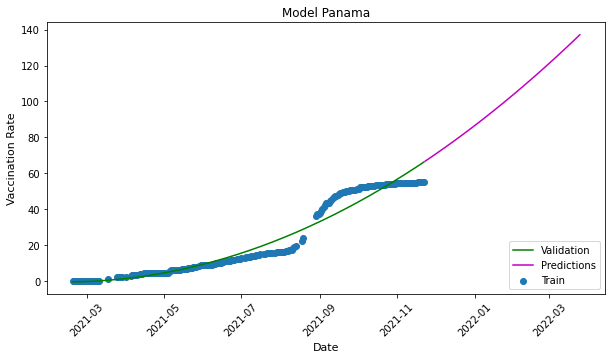

Observations in Actual Data = 229.000000, Predicted Observations=123.000000

 ------------- ('PCN', 'Oceania', 'Pitcairn') --------------

 ------------- ('PER', 'South America', 'Peru') --------------
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312
('PER', 'South America', 'Peru')
rmse:  1.1058669735505904
r2:  0.9954686418074312


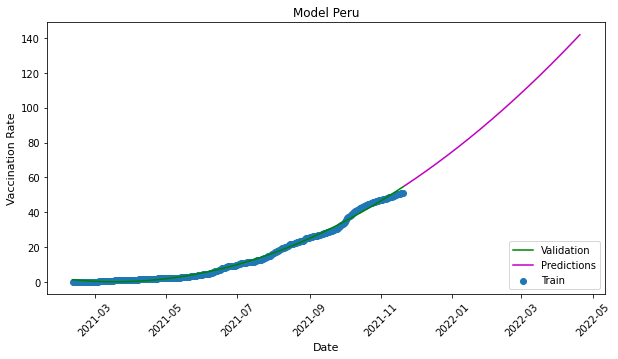

Observations in Actual Data = 284.000000, Predicted Observations=151.000000

 ------------- ('PHL', 'Asia', 'Philippines') --------------
('PHL', 'Asia', 'Philippines')
rmse:  1.026453858880525
r2:  0.9877865825422624
('PHL', 'Asia', 'Philippines')
rmse:  1.026453858880525
r2:  0.9877865825422624
('PHL', 'Asia', 'Philippines')
rmse:  1.026453858880525
r2:  0.9877865825422624
('PHL', 'Asia', 'Philippines')
rmse:  1.026453858880525
r2:  0.9877865825422624


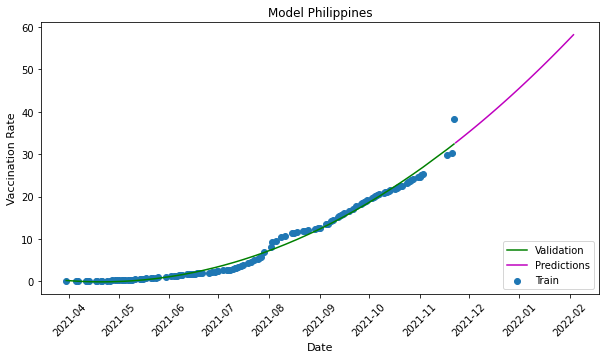

Observations in Actual Data = 129.000000, Predicted Observations=73.000000

 ------------- ('PLW', 'Oceania', 'Palau') --------------

 ------------- ('PNG', 'Oceania', 'Papua New Guinea') --------------

 ------------- ('POL', 'Europe', 'Poland') --------------
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376
('POL', 'Europe', 'Poland')
rmse:  5.620444377811697
r2:  0.9269833194960376


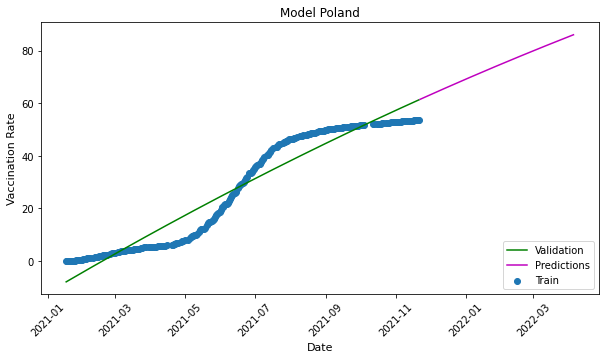

Observations in Actual Data = 253.000000, Predicted Observations=135.000000

 ------------- ('PRT', 'Europe', 'Portugal') --------------
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358
('PRT', 'Europe', 'Portugal')
rmse:  5.862707876755565
r2:  0.9599051489390358


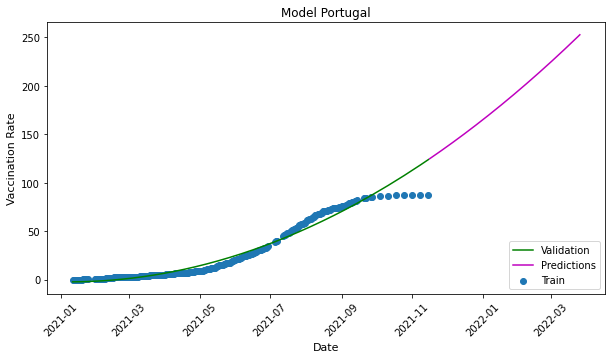

Observations in Actual Data = 243.000000, Predicted Observations=131.000000

 ------------- ('PRY', 'South America', 'Paraguay') --------------
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929
('PRY', 'South America', 'Paraguay')
rmse:  3.1430263050073735
r2:  0.8824143648989929


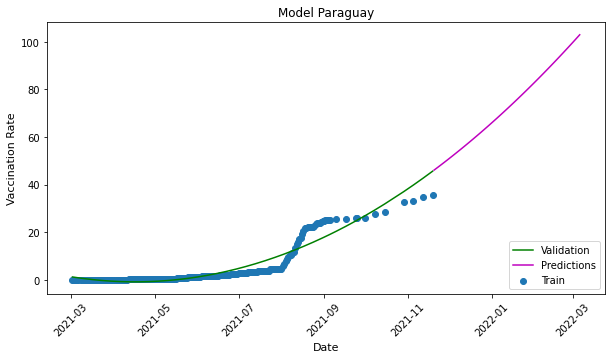

Observations in Actual Data = 197.000000, Predicted Observations=107.000000

 ------------- ('PSE', 'Asia', 'Palestine') --------------

 ------------- ('PYF', 'Oceania', 'French Polynesia') --------------

 ------------- ('QAT', 'Asia', 'Qatar') --------------
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693
('QAT', 'Asia', 'Qatar')
rmse:  1.0575446319672508
r2:  0.99524549020693


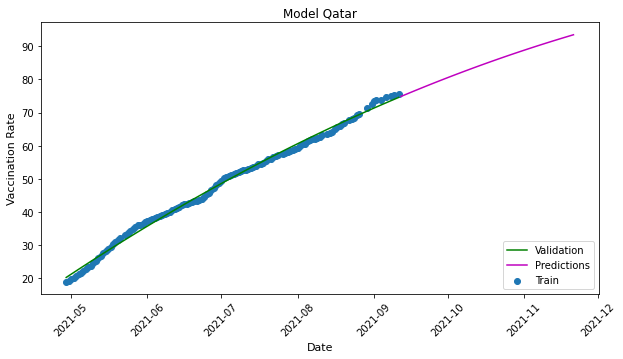

Observations in Actual Data = 125.000000, Predicted Observations=71.000000

 ------------- ('ROU', 'Europe', 'Romania') --------------
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877
('ROU', 'Europe', 'Romania')
rmse:  2.0105047990385216
r2:  0.9682274675612877


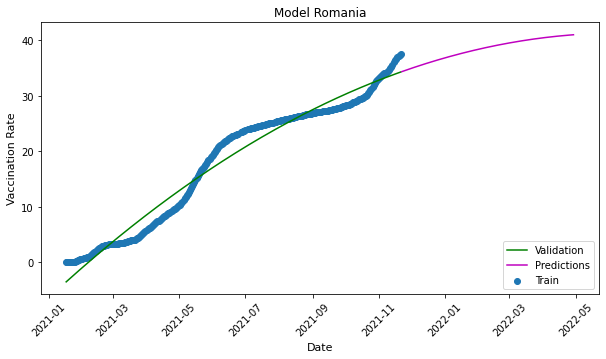

Observations in Actual Data = 301.000000, Predicted Observations=159.000000

 ------------- ('RUS', 'Europe', 'Russia') --------------
('RUS', 'Europe', 'Russia')
rmse:  1.315242640223853
r2:  0.9852670049717432
('RUS', 'Europe', 'Russia')
rmse:  1.315242640223853
r2:  0.9852670049717432
('RUS', 'Europe', 'Russia')
rmse:  1.315242640223853
r2:  0.9852670049717432
('RUS', 'Europe', 'Russia')
rmse:  1.315242640223853
r2:  0.9852670049717432


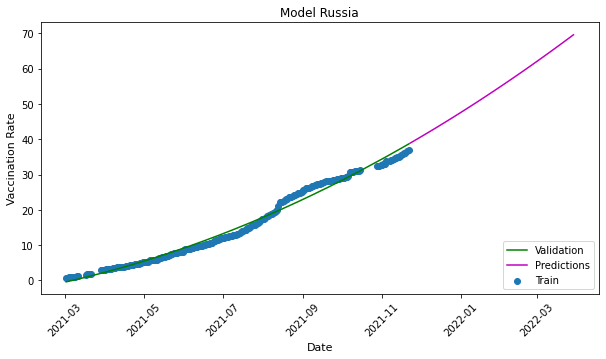

Observations in Actual Data = 236.000000, Predicted Observations=127.000000

 ------------- ('RWA', 'Africa', 'Rwanda') --------------

 ------------- ('SAU', 'Asia', 'Saudi Arabia') --------------
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.397256262824593
r2:  0.9948990084874324
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.397256262824593
r2:  0.9948990084874324
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.397256262824593
r2:  0.9948990084874324
('SAU', 'Asia', 'Saudi Arabia')
rmse:  1.397256262824593
r2:  0.9948990084874324


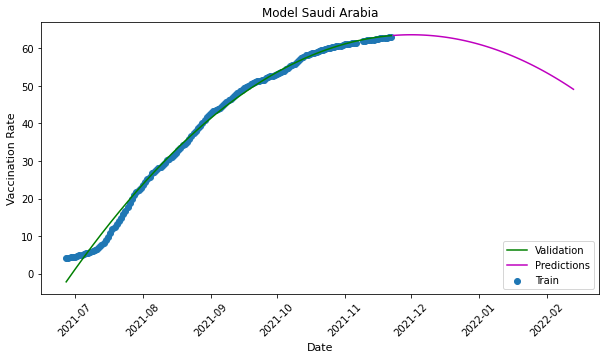

Observations in Actual Data = 147.000000, Predicted Observations=83.000000

 ------------- ('SDN', 'Africa', 'Sudan') --------------

 ------------- ('SEN', 'Africa', 'Senegal') --------------

 ------------- ('SGP', 'Asia', 'Singapore') --------------
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221
('SGP', 'Asia', 'Singapore')
rmse:  6.384821258220867
r2:  0.9505475285152221


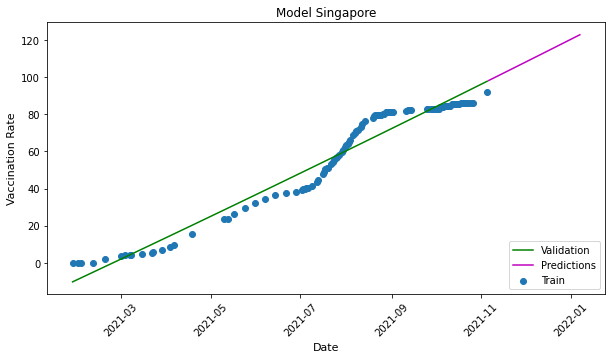

Observations in Actual Data = 108.000000, Predicted Observations=63.000000

 ------------- ('SHN', 'Africa', 'Saint Helena') --------------

 ------------- ('SLB', 'Oceania', 'Solomon Islands') --------------

 ------------- ('SLE', 'Africa', 'Sierra Leone') --------------

 ------------- ('SLV', 'North America', 'El Salvador') --------------
('SLV', 'North America', 'El Salvador')
rmse:  3.092814078387835
r2:  0.9766875701572046
('SLV', 'North America', 'El Salvador')
rmse:  3.092814078387835
r2:  0.9766875701572046
('SLV', 'North America', 'El Salvador')
rmse:  3.092814078387835
r2:  0.9766875701572046
('SLV', 'North America', 'El Salvador')
rmse:  3.092814078387835
r2:  0.9766875701572046


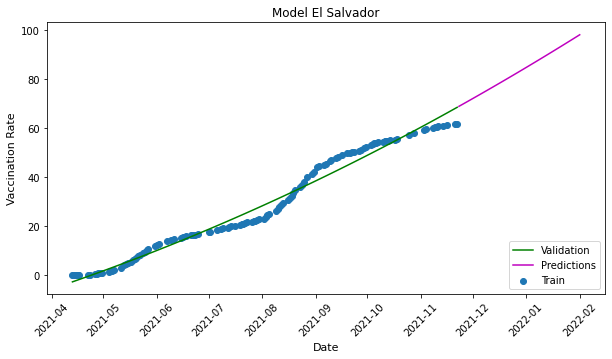

Observations in Actual Data = 123.000000, Predicted Observations=71.000000

 ------------- ('SMR', 'Europe', 'San Marino') --------------
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915
('SMR', 'Europe', 'San Marino')
rmse:  4.917313546472506
r2:  0.955584593371915


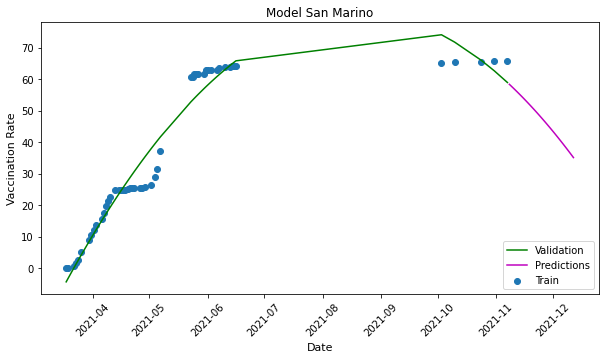

Observations in Actual Data = 52.000000, Predicted Observations=35.000000

 ------------- ('SOM', 'Africa', 'Somalia') --------------

 ------------- ('SRB', 'Europe', 'Serbia') --------------
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181
('SRB', 'Europe', 'Serbia')
rmse:  0.9856496168982374
r2:  0.994641224916181


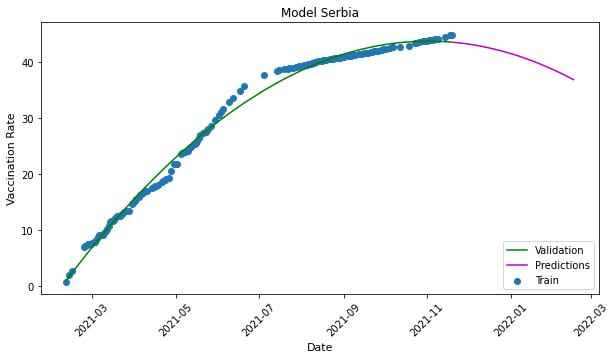

Observations in Actual Data = 160.000000, Predicted Observations=89.000000

 ------------- ('SSD', 'Africa', 'South Sudan') --------------

 ------------- ('STP', 'Africa', 'Sao Tome and Principe') --------------

 ------------- ('SUR', 'South America', 'Suriname') --------------
('SUR', 'South America', 'Suriname')
rmse:  2.191579323265003
r2:  0.9671151902014656
('SUR', 'South America', 'Suriname')
rmse:  2.191579323265003
r2:  0.9671151902014656
('SUR', 'South America', 'Suriname')
rmse:  2.191579323265003
r2:  0.9671151902014656
('SUR', 'South America', 'Suriname')
rmse:  2.191579323265003
r2:  0.9671151902014656


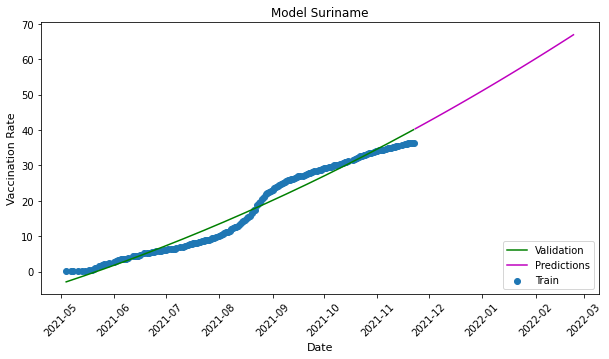

Observations in Actual Data = 167.000000, Predicted Observations=93.000000

 ------------- ('SVK', 'Europe', 'Slovakia') --------------
('SVK', 'Europe', 'Slovakia')
rmse:  3.934729265935738
r2:  0.9431946142055935
('SVK', 'Europe', 'Slovakia')
rmse:  3.934729265935738
r2:  0.9431946142055935
('SVK', 'Europe', 'Slovakia')
rmse:  3.934729265935738
r2:  0.9431946142055935
('SVK', 'Europe', 'Slovakia')
rmse:  3.934729265935738
r2:  0.9431946142055935


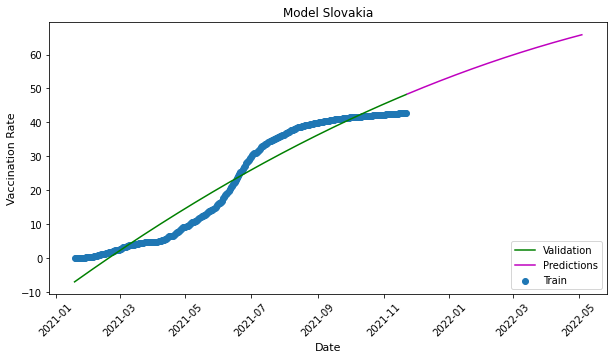

Observations in Actual Data = 309.000000, Predicted Observations=163.000000

 ------------- ('SVN', 'Europe', 'Slovenia') --------------
('SVN', 'Europe', 'Slovenia')
rmse:  3.848127551617275
r2:  0.9631445827052082
('SVN', 'Europe', 'Slovenia')
rmse:  3.848127551617275
r2:  0.9631445827052082
('SVN', 'Europe', 'Slovenia')
rmse:  3.848127551617275
r2:  0.9631445827052082
('SVN', 'Europe', 'Slovenia')
rmse:  3.848127551617275
r2:  0.9631445827052082


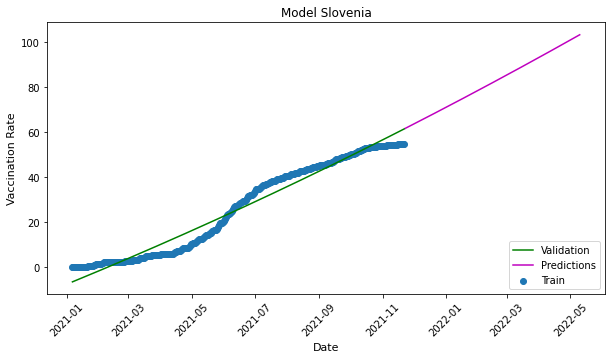

Observations in Actual Data = 321.000000, Predicted Observations=169.000000

 ------------- ('SWE', 'Europe', 'Sweden') --------------

 ------------- ('SWZ', 'Africa', 'Eswatini') --------------

 ------------- ('SXM', 'North America', 'Sint Maarten (Dutch part)') --------------

 ------------- ('SYC', 'Africa', 'Seychelles') --------------
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081
('SYC', 'Africa', 'Seychelles')
rmse:  3.9835949413213396
r2:  0.9724220581025081


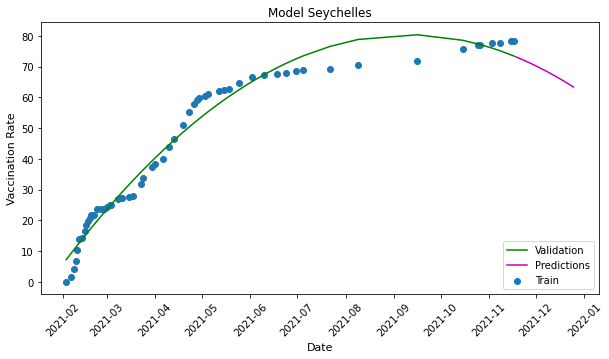

Observations in Actual Data = 58.000000, Predicted Observations=38.000000

 ------------- ('SYR', 'Asia', 'Syria') --------------

 ------------- ('TCA', 'North America', 'Turks and Caicos Islands') --------------

 ------------- ('TCD', 'Africa', 'Chad') --------------

 ------------- ('TGO', 'Africa', 'Togo') --------------

 ------------- ('THA', 'Asia', 'Thailand') --------------
('THA', 'Asia', 'Thailand')
rmse:  2.270140120366727
r2:  0.9816839424349519
('THA', 'Asia', 'Thailand')
rmse:  2.270140120366727
r2:  0.9816839424349519
('THA', 'Asia', 'Thailand')
rmse:  2.270140120366727
r2:  0.9816839424349519
('THA', 'Asia', 'Thailand')
rmse:  2.270140120366727
r2:  0.9816839424349519


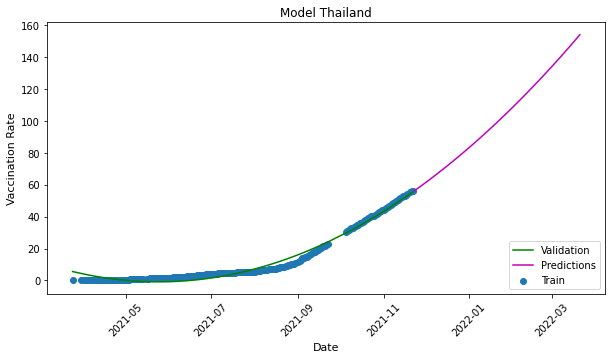

Observations in Actual Data = 219.000000, Predicted Observations=119.000000

 ------------- ('TJK', 'Asia', 'Tajikistan') --------------

 ------------- ('TKL', 'Oceania', 'Tokelau') --------------

 ------------- ('TKM', 'Asia', 'Turkmenistan') --------------

 ------------- ('TLS', 'Asia', 'Timor') --------------

 ------------- ('TON', 'Oceania', 'Tonga') --------------

 ------------- ('TTO', 'North America', 'Trinidad and Tobago') --------------
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.4756890713453363
r2:  0.9769735460834154
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.4756890713453363
r2:  0.9769735460834154
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.4756890713453363
r2:  0.9769735460834154
('TTO', 'North America', 'Trinidad and Tobago')
rmse:  2.4756890713453363
r2:  0.9769735460834154


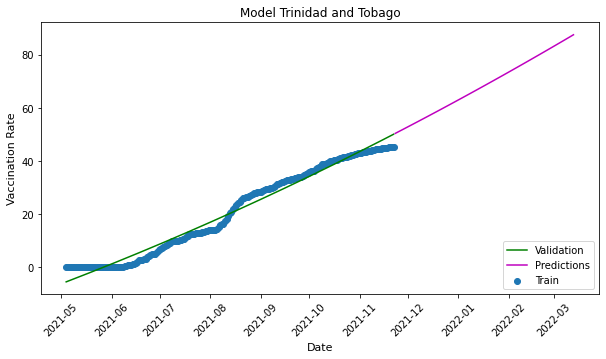

Observations in Actual Data = 203.000000, Predicted Observations=111.000000

 ------------- ('TUN', 'Africa', 'Tunisia') --------------
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353
('TUN', 'Africa', 'Tunisia')
rmse:  2.06858246652771
r2:  0.9806152844530353


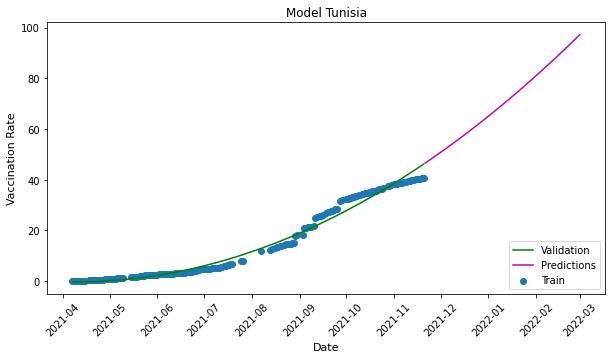

Observations in Actual Data = 185.000000, Predicted Observations=101.000000

 ------------- ('TUR', 'Asia', 'Turkey') --------------
('TUR', 'Asia', 'Turkey')
rmse:  3.062447999919491
r2:  0.9760270307423464
('TUR', 'Asia', 'Turkey')
rmse:  3.062447999919491
r2:  0.9760270307423464
('TUR', 'Asia', 'Turkey')
rmse:  3.062447999919491
r2:  0.9760270307423464
('TUR', 'Asia', 'Turkey')
rmse:  3.062447999919491
r2:  0.9760270307423464


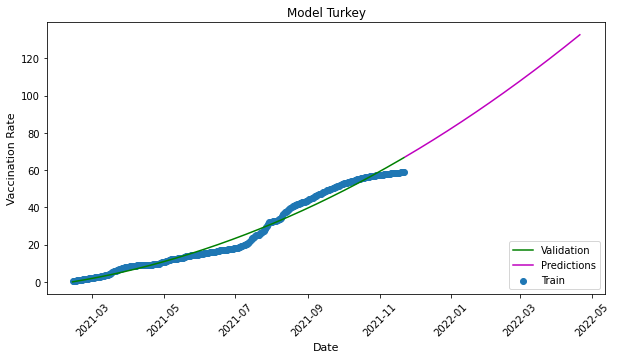

Observations in Actual Data = 282.000000, Predicted Observations=150.000000

 ------------- ('TUV', 'Oceania', 'Tuvalu') --------------

 ------------- ('TWN', 'Asia', 'Taiwan') --------------
('TWN', 'Asia', 'Taiwan')
rmse:  1.8136629017521104
r2:  0.983307648183617
('TWN', 'Asia', 'Taiwan')
rmse:  1.8136629017521104
r2:  0.983307648183617
('TWN', 'Asia', 'Taiwan')
rmse:  1.8136629017521104
r2:  0.983307648183617
('TWN', 'Asia', 'Taiwan')
rmse:  1.8136629017521104
r2:  0.983307648183617


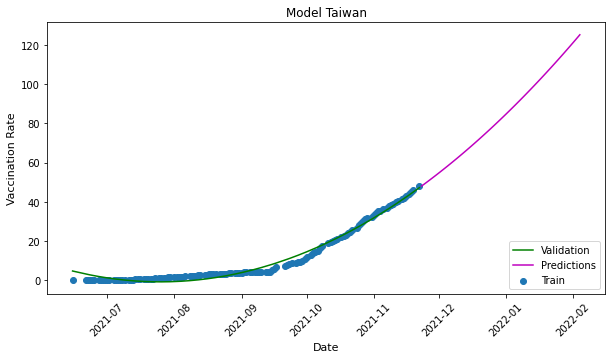

Observations in Actual Data = 130.000000, Predicted Observations=74.000000

 ------------- ('TZA', 'Africa', 'Tanzania') --------------

 ------------- ('UGA', 'Africa', 'Uganda') --------------

 ------------- ('UKR', 'Europe', 'Ukraine') --------------
('UKR', 'Europe', 'Ukraine')
rmse:  0.48029668751763566
r2:  0.995010180833362
('UKR', 'Europe', 'Ukraine')
rmse:  0.48029668751763566
r2:  0.995010180833362
('UKR', 'Europe', 'Ukraine')
rmse:  0.48029668751763566
r2:  0.995010180833362
('UKR', 'Europe', 'Ukraine')
rmse:  0.48029668751763566
r2:  0.995010180833362


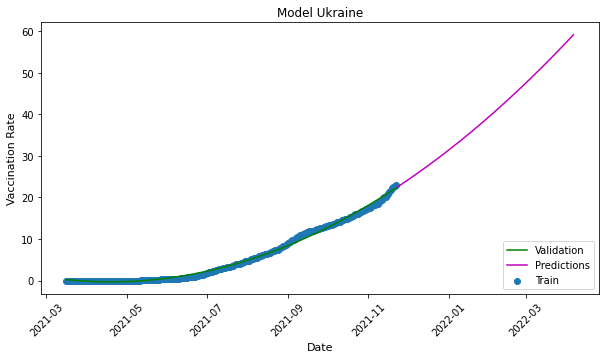

Observations in Actual Data = 252.000000, Predicted Observations=135.000000

 ------------- ('URY', 'South America', 'Uruguay') --------------
('URY', 'South America', 'Uruguay')
rmse:  2.878537888880426
r2:  0.9863719024408799
('URY', 'South America', 'Uruguay')
rmse:  2.878537888880426
r2:  0.9863719024408799
('URY', 'South America', 'Uruguay')
rmse:  2.878537888880426
r2:  0.9863719024408799
('URY', 'South America', 'Uruguay')
rmse:  2.878537888880426
r2:  0.9863719024408799


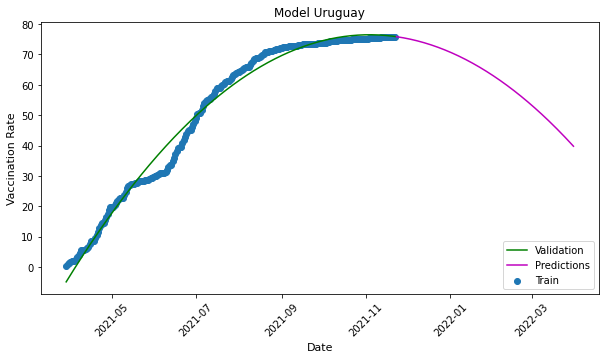

Observations in Actual Data = 239.000000, Predicted Observations=129.000000

 ------------- ('USA', 'North America', 'United States') --------------
('USA', 'North America', 'United States')
rmse:  3.7744052551091762
r2:  0.9689247494884927
('USA', 'North America', 'United States')
rmse:  3.7744052551091762
r2:  0.9689247494884927
('USA', 'North America', 'United States')
rmse:  3.7744052551091762
r2:  0.9689247494884927
('USA', 'North America', 'United States')
rmse:  3.7744052551091762
r2:  0.9689247494884927


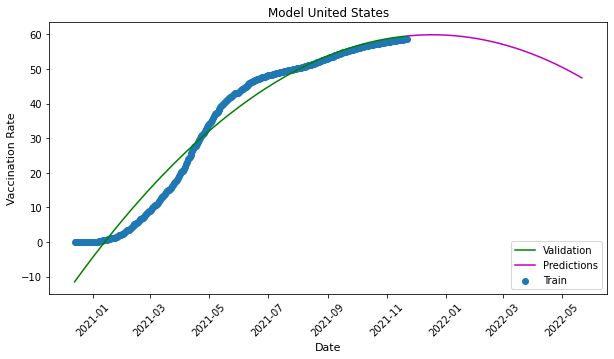

Observations in Actual Data = 345.000000, Predicted Observations=181.000000

 ------------- ('UZB', 'Asia', 'Uzbekistan') --------------

 ------------- ('VAT', 'Europe', 'Vatican') --------------

 ------------- ('VCT', 'North America', 'Saint Vincent and the Grenadines') --------------

 ------------- ('VEN', 'South America', 'Venezuela') --------------

 ------------- ('VGB', 'North America', 'British Virgin Islands') --------------

 ------------- ('VNM', 'Asia', 'Vietnam') --------------
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742
('VNM', 'Asia', 'Vietnam')
rmse:  2.029831233097666
r2:  0.9658303590979742


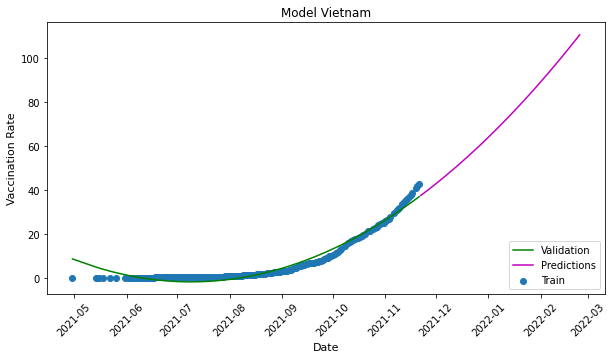

Observations in Actual Data = 171.000000, Predicted Observations=95.000000

 ------------- ('VUT', 'Oceania', 'Vanuatu') --------------

 ------------- ('WLF', 'Oceania', 'Wallis and Futuna') --------------

 ------------- ('WSM', 'Oceania', 'Samoa') --------------

 ------------- ('YEM', 'Asia', 'Yemen') --------------

 ------------- ('ZAF', 'Africa', 'South Africa') --------------
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531
('ZAF', 'Africa', 'South Africa')
rmse:  0.696087602319401
r2:  0.9923342473348531


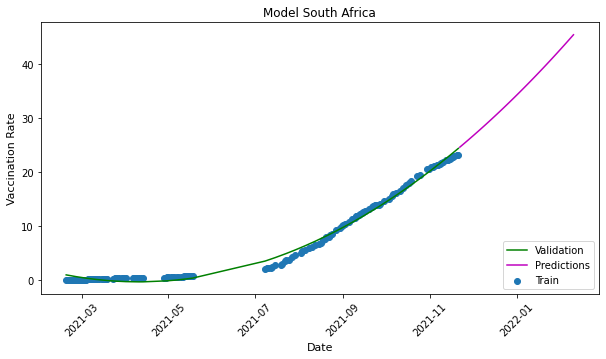

Observations in Actual Data = 143.000000, Predicted Observations=81.000000

 ------------- ('ZMB', 'Africa', 'Zambia') --------------
('ZMB', 'Africa', 'Zambia')
rmse:  0.13321380015422335
r2:  0.9831296934046978
('ZMB', 'Africa', 'Zambia')
rmse:  0.13321380015422335
r2:  0.9831296934046978
('ZMB', 'Africa', 'Zambia')
rmse:  0.13321380015422335
r2:  0.9831296934046978
('ZMB', 'Africa', 'Zambia')
rmse:  0.13321380015422335
r2:  0.9831296934046978


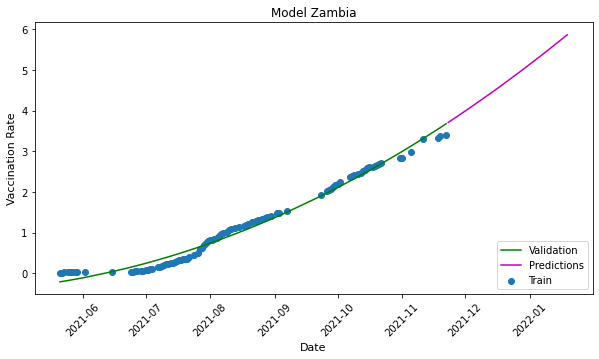

Observations in Actual Data = 98.000000, Predicted Observations=58.000000

 ------------- ('ZWE', 'Africa', 'Zimbabwe') --------------
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9698829649282087
r2:  0.9776836547494028
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9698829649282087
r2:  0.9776836547494028
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9698829649282087
r2:  0.9776836547494028
('ZWE', 'Africa', 'Zimbabwe')
rmse:  0.9698829649282087
r2:  0.9776836547494028


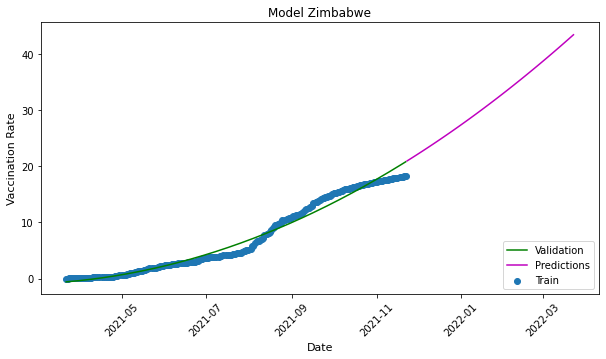

Observations in Actual Data = 225.000000, Predicted Observations=121.000000


In [ ]:
# Dictionaries to save the results of the model
dct_original = {}
dct_future = {}
# Access each country data seperately
for name, group in df_grouped:
    print('\n -------------',name,'--------------')
    # Make sure to select countries without NaN values in vaccination_rates
    group1 = group[group['people_fully_vaccinated'].notna()]
    # Countries with at least 50 vaccination data points for better predictions
    if len(group1) > 50:
    # Save outputs from the function into the following variables
        predict_dates = poly(name, group1)[2]
        model = poly(name, group1)[0]
        polynomial_features = poly(name, group1)[1]
        group_export = poly(name, group1)[3]
        group_export['Location'] = name[2]
    # Future predictions for the range of dates specified in the function. Again, remember to tranform the input
        Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1)))
    # Putting the predictions and dates into a dataframe
        Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)})
    # Converting the transformed dates to original date format
        Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal))
    # Add country to the dataframe to identify the data
        Predictions_df['Location'] = name[2]    
    
    # Save input data predictions and future predictions into dictionaries to access later
        dct_original[name] = group_export
        dct_future[name] = Predictions_df
    # Plot current observed, predicted and future predicted data
        plt.figure(figsize=(10,5))
        plt.xticks(rotation=45)
        plt.title('Model ' + name[2])
        plt.xlabel('Date', fontsize=11)
        plt.ylabel('Vaccination Rate', fontsize=11)
        plt.scatter(group_export.index, group_export['vaccination_rate'])
        plt.plot(group_export['Pred'], color = 'g')
        plt.plot(Predictions_df[['Predictions']], color = 'm')
        plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
        plt.show()
    # View the Actual vs Predicted data and their data count
        print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(group1), len(Predictions)))
       # print( "\n".join("{} {}".format(x, y) for x, y in zip(predict_dates, Predictions)))
        if name[2]=='Russia':
            Predictions_df_rus=Predictions_df

In [ ]:
Predictions_df_rus

,Future_dates,Predictions,Location
Future_dates,,,
2021-11-23,738117,38.947107,Russia
2021-11-24,738118,39.160055,Russia
2021-11-25,738119,39.373490,Russia
2021-11-26,738120,39.587411,Russia
2021-11-27,738121,39.801820,Russia
...,...,...,...
2022-03-25,738239,68.520755,Russia
2022-03-26,738240,68.793108,Russia
2022-03-27,738241,69.065948,Russia


In [ ]:
df_ru=df[df['location']=='Russia']
df_ru.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
100161,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100162,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100163,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100164,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN
100165,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145912022.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,0.000001,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ru = df2[['date','new_cases']]
df_ru.reset_index(inplace=True, drop=True)

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [ ]:
df_ru.columns = ['ds','y']

In [ ]:
# Split the data into testing and training datasets
train , test = df_ru[ df_ru['ds'] <= '2021-11-01'], df_ru[df_ru['ds'] >=  '2021-11-02']

In [ ]:
m = Prophet()

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future  =m.make_future_dataframe(periods = 60)
future

,ds
0,2020-01-31
1,2020-02-01
2,2020-02-02
3,2020-02-03
4,2020-02-04
...,...
696,2021-12-27
697,2021-12-28
698,2021-12-29
699,2021-12-30


In [ ]:
# Make prediction 
forecast = m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(31)


,ds,yhat,yhat_lower,yhat_upper
670,2021-12-01,33619.124514,29261.773281,37671.685649
671,2021-12-02,34363.881699,30338.919072,38285.925608
672,2021-12-03,34650.962102,30216.411660,38908.168468
673,2021-12-04,34823.025619,30536.747985,39089.845789
674,2021-12-05,34854.868349,30654.714041,38819.910090
675,2021-12-06,34790.878970,30522.213432,39366.804646
676,2021-12-07,34438.312166,30285.537253,38640.953982
677,2021-12-08,34448.775717,30187.513990,38666.160139
678,2021-12-09,35193.532901,30671.977234,39140.484138
679,2021-12-10,35480.613305,31126.283550,39637.743650


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

# Ploting the forecasted data

plot_plotly(m, forecast)

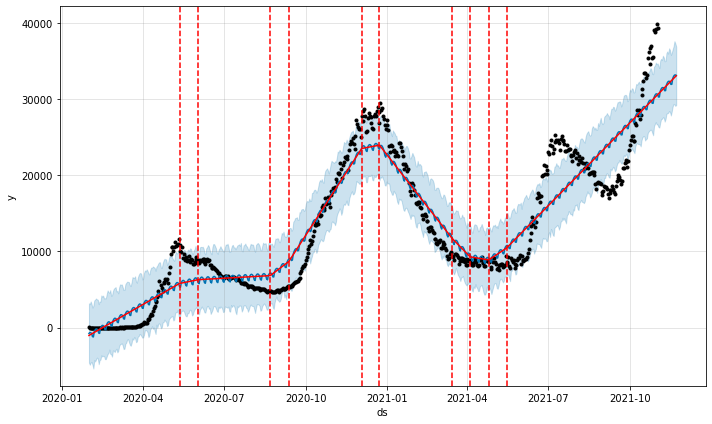

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# This particular feature helps us identify trend changes that are infered by the model

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
score = r2_score(test['y'], forecast[forecast['ds'] >= '2021-11-02']['trend'])

print('R-Sqaure score is {}'.format(score))

R-Sqaure score is -13.530025955668863


In [ ]:
# Add the predicted values to the original dataframe for plotting purpose

df_ru['predicted'] = forecast['trend']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Function to plot the forecast and the origianl values for comparison

def interactive_plot_forecasting(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['ds'],y = df[i], name = i)
    fig.show()

In [ ]:
interactive_plot_forecasting(df_ru, 'Original Vs Predicted')

NameError: ignored